<a href="https://www.kaggle.com/code/masatomurakawamm/tabnet-dnn-decisiontree-library-fromscratch?scriptVersionId=101552596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
# [Spaceship Titanic][1]

- We are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

---
#### **The aim of this notebook is to...**
- **1. Execute exploratory data analysis (EDA) and Feature Engineering. (<a href="#3">Chapter3</a>)**
- **2. Learn about [TabNet](https://github.com/google-research/google-research/tree/master/tabnet), and use [PyTorch-TabNet](https://github.com/dreamquark-ai/tabnet) library. (<a href="#4">Chapter4</a>)**
- **3. Deepen understanding of TabNet by building the model from scratch. (<a href="#5">Chapter5</a>)**


---
**References:** Thanks to previous great codes, blogs and notebooks.

- I refered to [[TabNet in Tensorflow 2.0][2]] when I built TabNet architecture from scratch, and I modified it in many ways.

- If you want to know more details about the TabNet, please refer to the paper: "[TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/abs/1908.07442)".

- Japanese tech-blogs.
 - [【論文解説】TabNetを理解する][3]
 - [【解説+実装】Sparsemax関数を理解する][4]
 - [TabNetとは一体何者なのか？][5]

---
#### **My Previous Notebooks:**
Please note that the EDA part in this notebook is same as my previous notebook below. If you have read it, you can skip over chapter 3.
- [SpaceshipTitanic: EDA + TabTransformer[TensorFlow]][6]

---
### **If you find this notebook useful, or when you copy&edit this notebook, please do give me an upvote. It helps me keep up my motivation.**

---
[1]: https://www.kaggle.com/competitions/spaceship-titanic/overview
[2]: https://www.kaggle.com/code/marcusgawronsky/tabnet-in-tensorflow-2-0/notebook
[3]: https://data-analytics.fun/2021/09/04/understanding-tabnet/
[4]: https://data-analytics.fun/2021/08/17/understanding-sparsemax/
[5]: https://zenn.dev/sinchir0/articles/9228eccebfbf579bfdf4
[6]: https://www.kaggle.com/code/masatomurakawamm/spaceshiptitanic-eda-tabtransformer-tensorflow

<h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>0. TABLE OF CONTENTS</center></h1>

<ul class="list-group" style="list-style-type:none;">
    <li><a href="#1" class="list-group-item list-group-item-action">1. Settings</a></li>
    <li><a href="#2" class="list-group-item list-group-item-action">2. Data Loading</a></li>
    <li><a href="#3" class="list-group-item list-group-item-action">3. Exploratory Data Analysis</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#3.1" class="list-group-item list-group-item-action">3.1 Feature Engineering</a></li>
            <li><a href="#3.2" class="list-group-item list-group-item-action">3.2 Target Distribution</a></li>
            <li><a href="#3.3" class="list-group-item list-group-item-action">3.3 Numerical Features</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#3.3.1" class="list-group-item list-group-item-action">3.3.1 Statistics of Numerical Features</a></li>
                    <li><a href="#3.3.2" class="list-group-item list-group-item-action">3.3.2 Binning for Numerical Features</a></li>
                </ul>
            </li>
            <li><a href="#3.4" class="list-group-item list-group-item-action">3.4 Categorical Feature</a></li>
            <li><a href="#3.5" class="list-group-item list-group-item-action">3.5 Data Processing Complete</a></li>
            <li><a href="#3.6" class="list-group-item list-group-item-action">3.6 Validation Split</a></li>
        </ul>
    </li>
    <li><a href="#4" class="list-group-item list-group-item-action">4. TabNet</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#4.1" class="list-group-item list-group-item-action">4.1 Pytorch_TabNet</a></li>
            <li><a href="#4.2" class="list-group-item list-group-item-action">4.2 Pre-training and Fine-tuning</a></li>
        </ul>
    </li>
    <li><a href="#5" class="list-group-item list-group-item-action">5. TabNet from Scratch</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#5.1" class="list-group-item list-group-item-action">5.1 Data Preprocessing for TabNet[TensorFlow]</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#5.1.1" class="list-group-item list-group-item-action">5.1.1 Datasets</a></li>
                    <li><a href="#5.1.2" class="list-group-item list-group-item-action">5.1.2 Preprocessing Layers</a></li>
                    <li><a href="#5.1.3" class="list-group-item list-group-item-action">5.1.3 Embedding Layers</a></li>
                </ul>
            </li>
            <li><a href="#5.2" class="list-group-item list-group-item-action">5.2 TabNet from Scratch[TensorFlow]</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#5.2.1" class="list-group-item list-group-item-action">5.2.1 TabNet Encoder from Scratch</a></li>
                    <li><a href="#5.2.2" class="list-group-item list-group-item-action">5.2.2 Training</a></li>
                    <li><a href="#5.2.3" class="list-group-item list-group-item-action">5.2.3 Inference</a></li>
                </ul>
            </li>
            <li><a href="#5.3" class="list-group-item list-group-item-action">5.3 Pre-training and Fine-tuning from Scratch</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#5.3.1" class="list-group-item list-group-item-action">5.3.1 TabNet Encoder-Decoder from Scratch</a></li>
                    <li><a href="#5.3.2" class="list-group-item list-group-item-action">5.3.2 Pre-Training and Fine-Tuning</a></li>
                    <li><a href="#5.3.3" class="list-group-item list-group-item-action">5.3.3 Inference</a></li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

<a id ="1"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>1. Settings</center></h1>

In [1]:
## Parameters
data_config = {'train.csv': '../input/spaceship-titanic/train.csv',
               'test.csv': '../input/spaceship-titanic/test.csv',
               'sample_submission.csv': '../input/spaceship-titanic/sample_submission.csv',
              }

exp_config = {'competition_name': 'spaceship-titanic',
              'n_bins': 10,
              'batch_size': 512,
              'n_splits': 5,
              'num_columns': 13,
              'train_epochs': 50,
              'pretrain_epochs': 10,
              'learning_rate': 2e-2,
              'pretrain_lr': 1e-2,
              'finetune_lr': 2e-2,
              'emb_learning_rate': 5e-3,
              'emb_finetune_lr': 5e-3,
              'checkpoint_filepath': './tmp/model/exp.ckpt',
             }

model_config = {'emb_dim': 1,
                'input_dims': 13,
                'output_dims': 1,
                'n_steps': 3,
                'feature_dims': 16,
                'gamma': 1.3,
                'epsilon': 1e-8,
                'lambda_sparsity': 1e-3,
                'mask_ratio': 0.25,
                'label_smoothing': 0.01,
               }

print('Parameters setted!')

Parameters setted!


In [2]:
## Import dependencies 
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
import pathlib
import gc
import sys
import re
import math 
import random
import time 
import datetime as dt
from tqdm import tqdm
from typing import Optional, Union, Tuple

import sklearn
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import warnings
warnings.filterwarnings('ignore')

print('import done!')

import done!


In [3]:
## For reproducible results    
def seed_all(s):
    random.seed(s)
    np.random.seed(s)
    tf.random.set_seed(s)
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['PYTHONHASHSEED'] = str(s) 
    print('Seeds setted!')
    
global_seed = 42
seed_all(global_seed)

## Limit GPU Memory in TensorFlow
## Because TensorFlow, by default, allocates the full amount of available GPU memory when it is launched. 
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
        print('{} memory growth: {}'.format(device, tf.config.experimental.get_memory_growth(device)))
else:
    print("Not enough GPU hardware devices available")

Seeds setted!
Not enough GPU hardware devices available


<a id ="2"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>2. Data Loading</center></h1>

---
### [File and Data Field Descriptions](https://www.kaggle.com/competitions/spaceship-titanic/data)

- **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
 - `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
 - `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
 - `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
 - `Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for *Port* or `S` for *Starboard*.
 - `Destination` - The planet the passenger will be debarking to.
 - `Age` - The age of the passenger.
 - `VIP` - Whether the passenger has paid for special VIP service during the voyage.
 - `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the *Spaceship Titanic*'s many luxury amenities.
 - `Name` - The first and last names of the passenger.
 - `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


- **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of `Transported` for the passengers in this set.


- **sample_submission.csv** - A submission file in the correct format.
 - `PassengerId` - Id for each passenger in the test set.
 - `Transported` - The target. For each passenger, predict either *True* or *False*.

---
### [Submission & Evaluation](https://www.kaggle.com/competitions/spaceship-titanic/overview/evaluation)

- Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

---

In [4]:
## Data Loading
train_df = pd.read_csv(data_config['train.csv'])
test_df = pd.read_csv(data_config['test.csv'])
submission_df = pd.read_csv(data_config['sample_submission.csv'])

print(f'train_length: {len(train_df)}')
print(f'test_lenght: {len(test_df)}')
print(f'submission_length: {len(submission_df)}')

train_length: 8693
test_lenght: 4277
submission_length: 4277


In [5]:
## Null Value Check
print('train_df.info()'); print(train_df.info(), '\n')
print('test_df.info()'); print(test_df.info(), '\n')

## train_df Check
train_df.head()

train_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None 

test_df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<a id ="3"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>3. Exploratory Data Analysis</center></h1>

<a id ="3.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.1 Feature Engineering</center></h2>

In [6]:
## Feature Selection
numerical_columns = ['Age', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns = ['PassengerId', 'HomePlanet', 'CryoSleep',
                       'Cabin', 'Destination', 'VIP', 'Name']
target = 'Transported'

## Number of unique values in each categorical features.
categorical_n_unique = {cc: train_df[cc].nunique() for cc in categorical_columns}
categorical_n_unique

{'PassengerId': 8693,
 'HomePlanet': 3,
 'CryoSleep': 2,
 'Cabin': 6560,
 'Destination': 3,
 'VIP': 2,
 'Name': 8473}

In [7]:
def preprocess_df(dataframe):
    df = dataframe.copy()
    
    ## Drop 'Name'
    df = df.drop(['Name'], axis=1)
    
    ## Transform 'Transported' column to 0 or 1.
    if 'Transported' in df.columns:
        df.loc[df['Transported']==True, 'Transported'] = 1.
        df.loc[df['Transported']==False, 'Transported'] = 0.
        df['Transported'] = df['Transported'].astype('int64')
    
    ## Transform True-False features (CryoSleep and VIP) to 'Yes' or 'No'.
    df.loc[df['CryoSleep']==True, 'CryoSleep'] = 'Yes'
    df.loc[df['CryoSleep']==False, 'CryoSleep'] = 'No'
    df['CryoSleep'] = df['CryoSleep'].astype(str)
    
    df.loc[df['VIP']==True, 'VIP'] = 'Yes'
    df.loc[df['VIP']==False, 'VIP'] = 'No'
    df['VIP'] = df['VIP'].astype(str)
    
    ## Transform the dtypes of HomePlanet and Destination to str
    df['HomePlanet'] = df['HomePlanet'].astype(str)
    df['Destination'] = df['Destination'].astype(str)
    
    return df

train = preprocess_df(train_df)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,No,B/0/P,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,No,F/0/S,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,No,A/0/S,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,No,A/0/S,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,No,F/1/S,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,1


**Note: After `astype(str)`, null values (np.nan) are replaced by the string 'nan'.**

In [8]:
## Handle 'Cabin' feature
def cabin_split(dataframe):
    df = dataframe.copy()
    
    df['Cabin'] = df['Cabin'].astype(str)
    cabins = df['Cabin'].str.split('/', expand=True)
    cabins.columns = ['Cabin_0', 'Cabin_1', 'Cabin_2']
    
    df = pd.concat([df, cabins], axis=1)
    df = df.drop(['Cabin'], axis=1)
    df['Cabin_0'].astype(str)
    df['Cabin_1'] = pd.to_numeric(df['Cabin_1'], errors='coerce')
    df['Cabin_2'].astype(str)
    df['Cabin_2'] = df['Cabin_2'].map(lambda x: 'nan' if x is None else x)
    
    return df

train = cabin_split(train)
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_0,Cabin_1,Cabin_2
0,0001_01,Europa,No,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,0002_01,Earth,No,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,0003_01,Europa,No,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S
3,0003_02,Europa,No,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S
4,0004_01,Earth,No,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S


<a id ="3.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.2 Target Distribution</center></h2>

In [9]:
categorical_columns = ['HomePlanet', 'CryoSleep',
                       'Destination', 'VIP']

train_pos = train.query('Transported==1').reset_index(drop=True)
train_neg = train.query('Transported==0').reset_index(drop=True)
print(f'positive samples: {len(train_pos)}, negative samples: {len(train_neg)}')

positive samples: 4378, negative samples: 4315


In [10]:
## Target Distribution
target_count = train.groupby(['Transported'])['PassengerId'].count()
target_percent = target_count / target_count.sum()

fig = go.Figure()
data = go.Bar(x=target_count.index.astype(str).values, 
              y=target_count.values)
fig.add_trace(data)
fig.update_layout(title = dict(text="Target distribution"),
                  xaxis = dict(title="Transported' values"),
                  yaxis = dict(title='counts'))
fig.show()

<a id ="3.3"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.3 Numerical Features</center></h2>

<a id ="3.3.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.3.1 Statistics of Numerical Features </center></h2>

In [11]:
train.describe().T.style.bar(subset=['mean'],)\
                        .background_gradient(subset=['std'], cmap='coolwarm')\
                        .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000
Cabin_1,8494.000000,600.367671,511.867226,0.000000,167.250000,427.000000,999.000000,1894.000000


In [12]:
train.groupby('Transported').describe().T

Transported                    0             1
Age          count   4226.000000   4288.000000
             mean      29.922858     27.748834
             std       13.699262     15.151705
             min        0.000000      0.000000
             25%       21.000000     18.000000
             50%       27.000000     26.000000
             75%       38.000000     37.000000
             max       79.000000     78.000000
RoomService  count   4217.000000   4295.000000
             mean     389.266066     63.098021
             std      875.638123    274.812497
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      473.000000      0.000000
             max    14327.000000   3992.000000
FoodCourt    count   4231.000000   4279.000000
             mean     382.615930    532.691984
             std     1200.115601   1931.306995
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%      179.000000      0.000000
             max    16856.000000  29813.000000
ShoppingMall count   4221.000000   4264.000000
             mean     167.566217    179.829972
             std      456.528126    722.026714
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        0.000000      0.000000
             75%       95.000000      0.000000
             max    10705.000000  23492.000000
Spa          count   4223.000000   4287.000000
             mean     564.382666     61.675531
             std     1551.356047    262.682871
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        4.000000      0.000000
             75%      453.500000      0.000000
             max    22408.000000   4103.000000
VRDeck       count   4225.000000   4280.000000
             mean     543.629822     69.148131
             std     1563.088368    291.658171
             min        0.000000      0.000000
             25%        0.000000      0.000000
             50%        1.000000      0.000000
             75%      388.000000      0.000000
             max    24133.000000   5063.000000
Cabin_1      count   4216.000000   4278.000000
             mean     623.619070    577.453249
             std      525.438037    497.129959
             min        0.000000      0.000000
             25%      182.000000    154.000000
             50%      448.500000    385.000000
             75%     1060.000000    964.000000
             max     1894.000000   1893.000000

In [13]:
quantiles = [0, 0.9, 0.95, 0.98, 0.99, 1]
train_quantile_values = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].quantile(quantiles)
train_quantile_values

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0.00,0.00,0.00,0.00,0.00,0.00
0.90,753.00,1026.00,619.60,732.00,732.60
0.95,1274.25,2748.50,927.80,1607.10,1534.20
0.98,2213.90,5208.74,1749.32,3731.56,3654.96
0.99,3096.23,8033.31,2333.44,5390.10,5646.68
1.00,14327.00,29813.00,23492.00,22408.00,24133.00


---
#### There seems to be outliers...

---

In [14]:
## Clipping outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values=None, quantile=0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].quantile(quantile)
    
    for num_column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values    
    return df

train = clipping_quantile(train, quantile_values=None, quantile=0.99)

train.describe().T.style.bar(subset=['mean'],)\
                        .background_gradient(subset=['std'], cmap='coolwarm')\
                        .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
RoomService,8512.000000,207.556248,528.543529,0.000000,0.000000,0.000000,47.000000,3096.230000
FoodCourt,8510.000000,415.275988,1246.172856,0.000000,0.000000,0.000000,76.000000,8033.310000
ShoppingMall,8485.000000,154.611597,402.218859,0.000000,0.000000,0.000000,27.000000,2333.440000
Spa,8510.000000,275.967991,829.249879,0.000000,0.000000,0.000000,59.000000,5390.100000
VRDeck,8505.000000,269.573249,835.468811,0.000000,0.000000,0.000000,46.000000,5646.680000
Transported,8693.000000,0.503624,0.500016,0.000000,0.000000,1.000000,1.000000,1.000000
Cabin_1,8494.000000,600.367671,511.867226,0.000000,167.250000,427.000000,999.000000,1894.000000


In [15]:
## After clipping outliers on 99% quantile
train.groupby('Transported').describe().T

Transported                   0            1
Age          count  4226.000000  4288.000000
             mean     29.922858    27.748834
             std      13.699262    15.151705
             min       0.000000     0.000000
             25%      21.000000    18.000000
             50%      27.000000    26.000000
             75%      38.000000    37.000000
             max      79.000000    78.000000
RoomService  count  4217.000000  4295.000000
             mean    355.263133    62.531816
             std     669.059108   267.834337
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       1.000000     0.000000
             75%     473.000000     0.000000
             max    3096.230000  3096.230000
FoodCourt    count  4231.000000  4279.000000
             mean    366.197677   463.803760
             std    1055.354287  1408.125909
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       0.000000     0.000000
             75%     179.000000     0.000000
             max    8033.310000  8033.310000
ShoppingMall count  4221.000000  4264.000000
             mean    159.067491   150.200638
             std     363.729980   436.991977
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       0.000000     0.000000
             75%      95.000000     0.000000
             max    2333.440000  2333.440000
Spa          count  4223.000000  4287.000000
             mean    493.508075    61.675531
             std    1105.389588   262.682871
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       4.000000     0.000000
             75%     453.500000     0.000000
             max    5390.100000  4103.000000
VRDeck       count  4225.000000  4280.000000
             mean    472.607451    69.148131
             std    1112.278126   291.658171
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       1.000000     0.000000
             75%     388.000000     0.000000
             max    5646.680000  5063.000000
Cabin_1      count  4216.000000  4278.000000
             mean    623.619070   577.453249
             std     525.438037   497.129959
             min       0.000000     0.000000
             25%     182.000000   154.000000
             50%     448.500000   385.000000
             75%    1060.000000   964.000000
             max    1894.000000  1893.000000

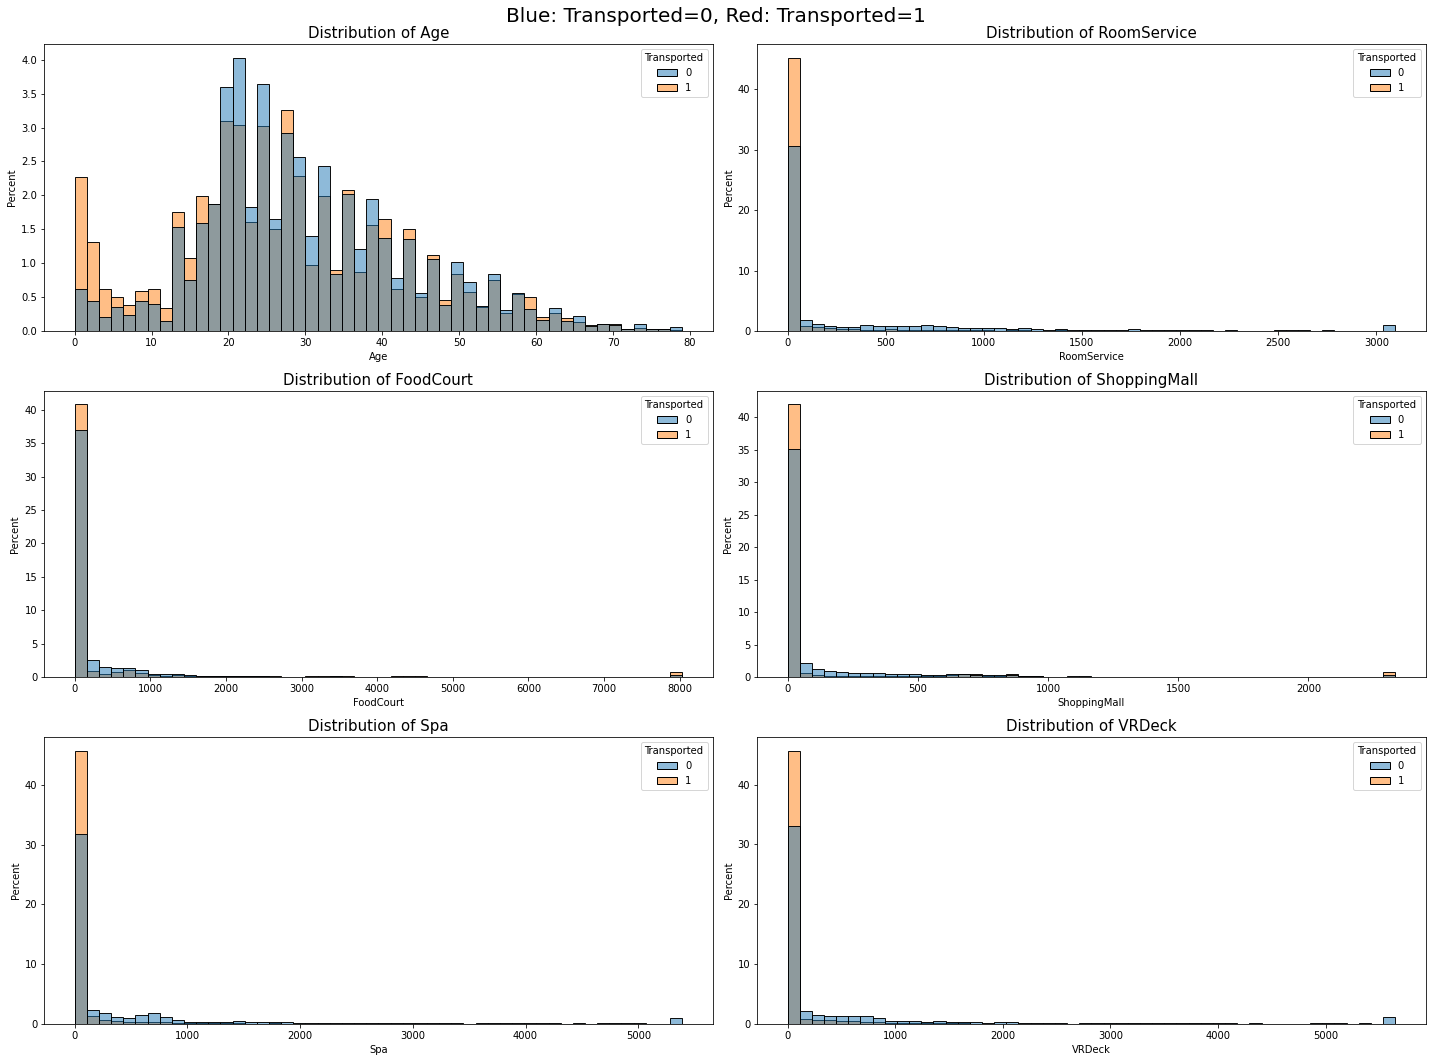

In [16]:
## After clipping outliers on 99% quantile
n_cols = 2
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,15))

bins = 50
for i, column in enumerate(numerical_columns):
    q, mod = divmod(i, n_cols)
    sns.histplot(x=column, data=train, hue='Transported', ax=axes[q][mod], bins=bins, stat="percent", legend=True)
    axes[q][mod].set_title(f'Distribution of {numerical_columns[i]}',size=15)
    
fig.suptitle('Blue: Transported=0, Red: Transported=1', fontsize=20)
fig.tight_layout()
plt.show()

In [17]:
## Heat map of Correlation Matrix
fig = px.imshow(train.corr(),
                color_continuous_scale='RdBu_r',
                color_continuous_midpoint=0, 
                aspect='auto')
fig.update_layout(height=500, 
                  width=500,
                  title = "Heatmap",                  
                  showlegend=False)
fig.show()

<a id ="3.3.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.3.2 Binning for Numerical Features </center></h2>

### Binning Method
- `Age`: 0 to 100 at intervals of 5.

- `other numerical features`: Split into 10 bins.
 - 1. Value=0 is the first bin ( get by (-1, 0] ).
 - 2. Get quantiles at [ 0, 0.9, 0.95, 0.99, 1 ].
 - 3. Split between quantiles_0 and quantiles_0.9 into 6 bins.
 - 4. Use quantiles_0.95, _0.99, _1 for the rest boundary.

In [18]:
def bin_split(dataframe, column, n_bins, thresholds=None):
    if thresholds is None:
        if column == 'Age':
            bins = np.array([i*5 for i in range(21)])
        else:
            bins = np.array([-1, ])
            x = dataframe[column]
            x_quantiles = x.quantile([0, 0.9, 0.95, 0.99, 1])
            bins = np.append(bins, [i * ((x_quantiles.iloc[1] - x_quantiles.iloc[0]) / (n_bins-4)) for i in range(n_bins-4)])
            bins = np.append(bins, [x_quantiles.iloc[1], x_quantiles.iloc[2], x_quantiles.iloc[3], x_quantiles.iloc[4]+1])
    else:
        bins = thresholds[column]
        
    splits = pd.cut(dataframe[column], bins=bins, labels=False, right=True)
    return splits, bins

def binning(dataframe, numerical_columns, n_bins, thresholds=None):
    df = dataframe.copy()
    df_split_bins = {}
    for num_column in numerical_columns:
        splits, bins = bin_split(df, num_column, n_bins, thresholds)
        df[num_column] = splits
        df_split_bins[num_column] = bins    
    return df, df_split_bins

n_bins = exp_config['n_bins']
train, train_split_bins = binning(train, numerical_columns, n_bins, thresholds=None)

for key in train_split_bins:
    print(f'{key} bins: \n{train_split_bins[key]}\n\n')

Age bins: 
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]


RoomService bins: 
[-1.0000000e+00  0.0000000e+00  1.2550000e+02  2.5100000e+02
  3.7650000e+02  5.0200000e+02  6.2750000e+02  7.5300000e+02
  1.2742500e+03  3.0955447e+03  3.0972300e+03]


FoodCourt bins: 
[-1.0000000e+00  0.0000000e+00  1.7100000e+02  3.4200000e+02
  5.1300000e+02  6.8400000e+02  8.5500000e+02  1.0260000e+03
  2.7485000e+03  8.0299521e+03  8.0343100e+03]


ShoppingMall bins: 
[-1.00000000e+00  0.00000000e+00  1.03266667e+02  2.06533333e+02
  3.09800000e+02  4.13066667e+02  5.16333333e+02  6.19600000e+02
  9.27800000e+02  2.33223040e+03  2.33444000e+03]


Spa bins: 
[-1.000000e+00  0.000000e+00  1.220000e+02  2.440000e+02  3.660000e+02
  4.880000e+02  6.100000e+02  7.320000e+02  1.607100e+03  5.389281e+03
  5.391100e+03]


VRDeck bins: 
[-1.0000000e+00  0.0000000e+00  1.2210000e+02  2.4420000e+02
  3.6630000e+02  4.8840000e+02  6.1050000e+02  7.3260000e+02
  1.5342000e+

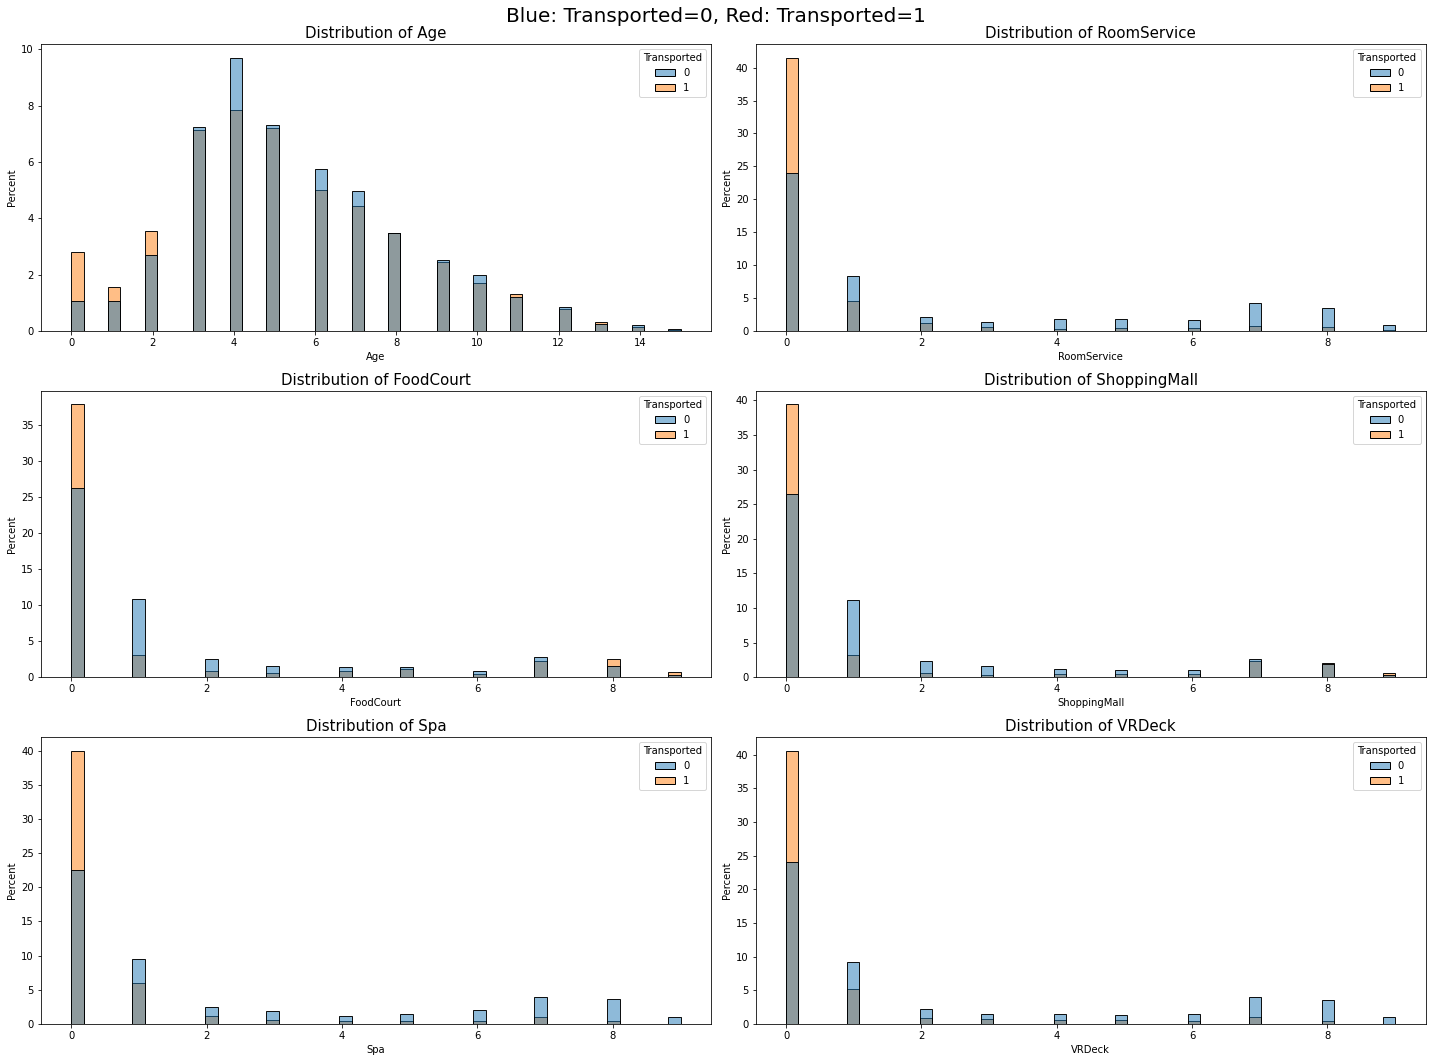

In [19]:
## After Binning
n_cols = 2
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,15))

bins = 50
for i, column in enumerate(numerical_columns):
    q, mod = divmod(i, n_cols)
    sns.histplot(x=column, data=train, hue='Transported', ax=axes[q][mod], bins=bins, stat="percent", legend=True)
    axes[q][mod].set_title(f'Distribution of {numerical_columns[i]}',size=15)
    
fig.suptitle('Blue: Transported=0, Red: Transported=1', fontsize=20)
fig.tight_layout()
plt.show()

<a id ="3.4"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.4 Categorical Features</center></h2>

In [20]:
## Make Figure object
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=categorical_columns,
                    shared_yaxes='all')

for i in range(2):
    for j in range(2):
        n = i*2 + j
        ## Make trace (graph object)
        data0 = go.Histogram(x=train_neg[categorical_columns[n]],
                             marker = dict(color='#0000FF'), ## Blue
                             name='Transporetd=0')
        data1 = go.Histogram(x=train_pos[categorical_columns[n]],
                             marker = dict(color='#FF0000'), ## Red
                             name='Transported=1')
        
        ## Add the trace to the Figure
        fig.add_trace(data0, row=i+1, col=j+1)
        fig.add_trace(data1, row=i+1, col=j+1)
        
        fig.update_traces(opacity=0.75, histnorm='probability')
        #fig.update_layout(barmode='overlay')

## Setting layouts
fig.update_layout(title = dict(text='Blue: Transported=0, Red: Transported=1'),
                  showlegend=False,)
fig.update_yaxes(title='probability', row=1, col=1)
fig.update_yaxes(title='probability', row=2, col=1)

## Show the Figure
fig.show()

### Cabin Features

<AxesSubplot:xlabel='Cabin_0', ylabel='count'>

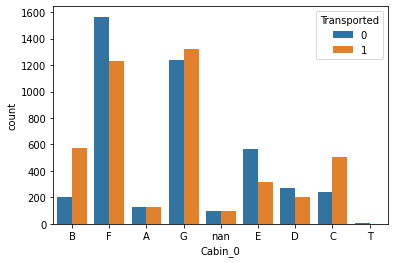

In [21]:
## 'Cabin_0'
sns.countplot(x='Cabin_0', data=train, hue='Transported')

<AxesSubplot:xlabel='Cabin_1', ylabel='Count'>

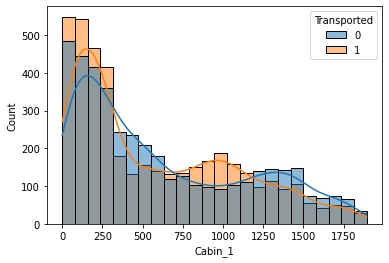

In [22]:
## 'Cabin_1'
sns.histplot(x='Cabin_1', data=train, hue='Transported', kde=True)

<AxesSubplot:xlabel='Cabin_2', ylabel='count'>

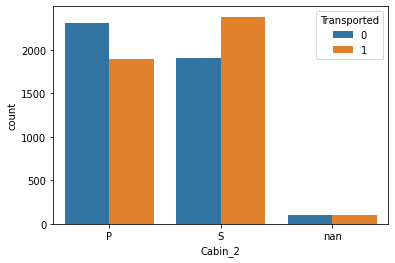

In [23]:
## 'Cabin_2'
sns.countplot(x='Cabin_2', data=train, hue='Transported')

### Binning 'Cabin_1'

In [24]:
## Histogram of 'Cabin_1' by Plotly (interactive)
fig = go.Figure()

data0 = go.Histogram(x=train_neg['Cabin_1'],
                             marker = dict(color='#0000FF'), # Blue
                             opacity=0.6,
                             name='Transporetd=0')
data1 = go.Histogram(x=train_pos['Cabin_1'],
                             marker = dict(color='#FF0000'), # Red
                             opacity=0.6,
                             name='Transported=1')

fig.add_trace(data0)
fig.add_trace(data1)

fig.update_layout(xaxis = dict(title='Cabin_1'),
                  yaxis = dict(title='Count'))
fig.update_layout(barmode='overlay')

fig.show()

In [25]:
## Binning 'Cabin_1' based on the above graph
cabin_1_bins = np.array([0, 300, 600, 1150, 1500, 1700, 2000])
train['Cabin_1'] = pd.cut(train['Cabin_1'], bins=cabin_1_bins, labels=False, right=False)

<AxesSubplot:xlabel='Cabin_1', ylabel='count'>

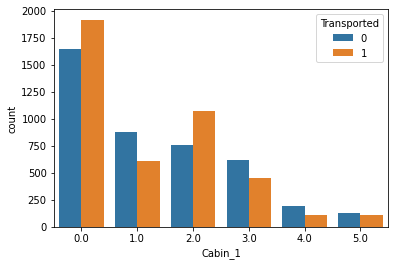

In [26]:
## 'Cabin_1' after binning
sns.countplot(x='Cabin_1', data=train, hue='Transported')

<a id ="3.5"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.5 Data Processing Complete </center></h2>

In [27]:
numerical_columns_0 = ['Age', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck']
numerical_columns_1 = ['Age', 'RoomService', 'FoodCourt',
                     'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_1']
categorical_columns_0 = ['PassengerId', 'HomePlanet', 'CryoSleep',
                       'Cabin', 'Destination', 'VIP', 'Name']
categorical_columns_1 = ['PassengerId', 'HomePlanet', 'CryoSleep',
                       'Cabin', 'Destination', 'VIP', 'Name',
                       'Cabin_0', 'Cabin_2']

In [28]:
## Before filling null values,　making the string 'nan' (transformed by astype(str) in preprocess_df() function) back to np.nan.
for column in ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Cabin_0', 'Cabin_2']:
    train[column] = train[column].map(lambda x: np.nan if x=='nan' else x)


## Filling null values with mode
train = train.fillna(train.mode().iloc[0])

for numerical in numerical_columns_1:
    train[numerical] = train[numerical].astype('int64')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   object
 2   CryoSleep     8693 non-null   object
 3   Destination   8693 non-null   object
 4   Age           8693 non-null   int64 
 5   VIP           8693 non-null   object
 6   RoomService   8693 non-null   int64 
 7   FoodCourt     8693 non-null   int64 
 8   ShoppingMall  8693 non-null   int64 
 9   Spa           8693 non-null   int64 
 10  VRDeck        8693 non-null   int64 
 11  Transported   8693 non-null   int64 
 12  Cabin_0       8693 non-null   object
 13  Cabin_1       8693 non-null   int64 
 14  Cabin_2       8693 non-null   object
dtypes: int64(8), object(7)
memory usage: 1018.8+ KB


In [29]:
## Test Data Processing
test = preprocess_df(test_df)
test = cabin_split(test)

test = clipping_quantile(test, quantile_values=train_quantile_values.loc[0.99])
test, _ = binning(test, numerical_columns_0, n_bins, thresholds=train_split_bins)
test['Cabin_1'] = pd.cut(test['Cabin_1'], bins=cabin_1_bins, labels=False, right=False)

for column in ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Cabin_0', 'Cabin_2']:
    test[column] = test[column].map(lambda x: np.nan if x=='nan' else x)

test = test.fillna(train.mode().iloc[0])

for numerical in numerical_columns_1:
    test[numerical] = test[numerical].astype('int64')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4277 non-null   object
 2   CryoSleep     4277 non-null   object
 3   Destination   4277 non-null   object
 4   Age           4277 non-null   int64 
 5   VIP           4277 non-null   object
 6   RoomService   4277 non-null   int64 
 7   FoodCourt     4277 non-null   int64 
 8   ShoppingMall  4277 non-null   int64 
 9   Spa           4277 non-null   int64 
 10  VRDeck        4277 non-null   int64 
 11  Cabin_0       4277 non-null   object
 12  Cabin_1       4277 non-null   int64 
 13  Cabin_2       4277 non-null   object
dtypes: int64(7), object(7)
memory usage: 467.9+ KB


<a id ="3.6"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.6 Validation Split </center></h2>

In [30]:
## Split train samples for cross-validation
n_splits = exp_config['n_splits']
skf = StratifiedKFold(n_splits=n_splits)
train['k_folds'] = -1
for fold, (train_idx, valid_idx) in enumerate(skf.split(X=train,
                                                        y=train['Transported'])):
    train['k_folds'][valid_idx] = fold
    
## Check split samples
for i in range(n_splits):
    print(f"fold {i}: {len(train.query('k_folds==@i'))} samples")

fold 0: 1739 samples
fold 1: 1739 samples
fold 2: 1739 samples
fold 3: 1738 samples
fold 4: 1738 samples


In [31]:
## Hold-out validation
valid_fold = train.query(f'k_folds == 0').reset_index(drop=True)
train_fold = train.query(f'k_folds != 0').reset_index(drop=True)
print(len(train_fold), len(valid_fold))

6954 1739


<a id ="4"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>4. TabNet</center></h1>

**[TabNet](https://github.com/google-research/google-research/tree/master/tabnet)** is a deep neural network architecture which adapts the decision tree algorithm, and thereby improves its interpretability and performance on the tabular data.

The figure below shows the simple example of how to achieve decision tree-like calculation by neural networks. The features used are selected by masks at each decision steps: $x_1$ is used at the first step, and $x_2$ at the second step.

<img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-21.png" width="700"/>

In the TabNet model, feature selecting-masks are made for each sample from the input data by the attention mechanism. I will explain details in the following section (<a href="#5">5. TabNet from Scratch</a>), and now let's look at the example of data-processing flow in TabNet.

<img src="https://data-analytics.fun/wp-content/uploads/2021/09/image-1.png" width="800"/>

There is a commonly used repository, **[pytorch-tabnet](https://github.com/dreamquark-ai/tabnet)**. Let's make use of it!

<a id ="4.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>4.1 Pytorch_TabNet</center></h2>

In [32]:
## Data Preprocessing for Pytorch_TabNet
from sklearn.preprocessing import LabelEncoder

numerical_columns = []
categorical_columns = ['Age', 'RoomService', 'FoodCourt',
                       'ShoppingMall', 'Spa', 'VRDeck',
                       'HomePlanet', 'CryoSleep',
                       'Destination', 'VIP', 
                       'Cabin_0', 'Cabin_1', 'Cabin_2']
feature_columns = numerical_columns + categorical_columns
target_column = 'Transported'


## Create Datasets
y_train = train_fold[target_column]
y_train = y_train.values
train_fold_features = train_fold[feature_columns]

y_valid = valid_fold[target_column]
y_valid = y_valid.values
valid_fold_features = valid_fold[feature_columns]

test_features = test[feature_columns]

categorical_dims = {}
for col in categorical_columns:
    #print(col, train_fold_features[col].nunique())
    l_enc = LabelEncoder()
    train_fold_features[col] = train_fold_features[col].fillna("VV_likely")
    train_fold_features[col] = l_enc.fit_transform(train_fold_features[col].values)
    valid_fold_features[col] = valid_fold_features[col].fillna('VV_likey')
    valid_fold_features[col] = l_enc.transform(valid_fold_features[col].values) 
    test_features[col] = test_features[col].fillna('VV_likey')
    test_features[col] = l_enc.transform(test_features[col].values) 
    categorical_dims[col] = len(l_enc.classes_)
    
cat_idxs = [ i for i, f in enumerate(train_fold_features.columns) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(train_fold_features.columns) if f in categorical_columns]

X_train = train_fold_features.values
X_valid = valid_fold_features.values
X_test = test_features.values

In [33]:
## Import dependencies 
!pip install -q -U pytorch_tabnet 

import torch
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.tab_model import TabNetClassifier

In [34]:
## Creating Model
tabnet_params = dict(n_d=8, n_a=8, n_steps=3, gamma=1.3,
                     n_independent=2, n_shared=2,
                     seed=global_seed, lambda_sparse=1e-3,
                     optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=exp_config['learning_rate']),
                     mask_type='entmax',
                     scheduler_params=dict(mode="min",
                                           patience=5,
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=10,
                     cat_idxs=cat_idxs, # comment out when Unsupervised
                     cat_dims=cat_dims, # comment out when Unsupervised
                     cat_emb_dim=1 # comment out when Unsupervised
                     )

model = TabNetClassifier(**tabnet_params)

Device used : cpu


In [35]:
## Model Training
batch_size = exp_config['batch_size']

model.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric = ['auc'],
    max_epochs=100,
    patience=20, batch_size=batch_size,
    virtual_batch_size=128,
    num_workers=0, drop_last=False)

epoch 0  | loss: 0.6504  | train_auc: 0.65922 | valid_auc: 0.65322 |  0:00:00s
epoch 10 | loss: 0.45036 | train_auc: 0.83804 | valid_auc: 0.80031 |  0:00:06s
epoch 20 | loss: 0.42631 | train_auc: 0.87719 | valid_auc: 0.83465 |  0:00:12s
epoch 30 | loss: 0.42202 | train_auc: 0.88969 | valid_auc: 0.84312 |  0:00:17s
epoch 40 | loss: 0.41782 | train_auc: 0.89297 | valid_auc: 0.84292 |  0:00:23s
epoch 50 | loss: 0.41608 | train_auc: 0.89406 | valid_auc: 0.84283 |  0:00:29s

Early stopping occurred at epoch 56 with best_epoch = 36 and best_valid_auc = 0.84428
Best weights from best epoch are automatically used!


dict_keys(['loss', 'lr', 'train_auc', 'valid_auc'])


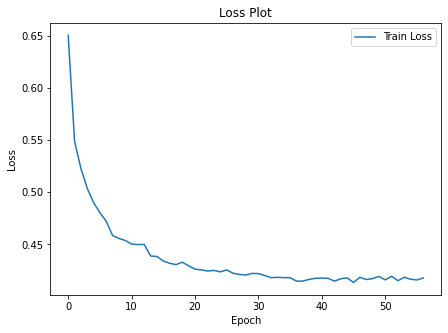

In [36]:
print(model.history.history.keys())

## Plot Losses
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(model.history['loss'])),
         model.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Plot')
plt.show()

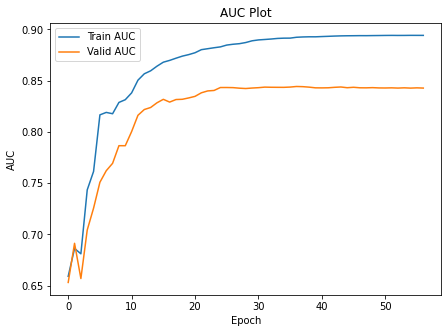

In [37]:
## Plot AUCs
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(model.history['train_auc'])),
         model.history['train_auc'], label='Train AUC')
plt.plot(np.arange(len(model.history['valid_auc'])),
         model.history['valid_auc'], label='Valid AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC Plot')
plt.show()

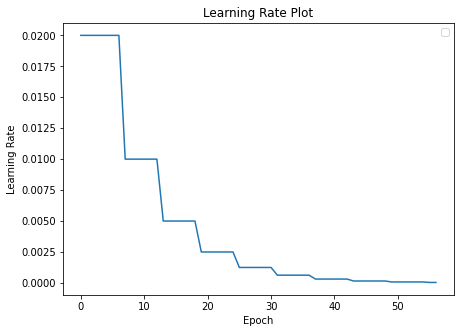

In [38]:
## Plot Learning Rates
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(model.history['lr'])),
         model.history['lr'])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Learning Rate Plot')
plt.show()

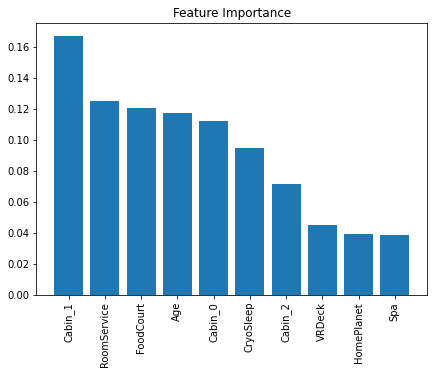

In [39]:
## Plot Feature Importance
importance = model.feature_importances_
importance_df = pd.DataFrame(importance,
                             index=feature_columns,
                             columns=['importance'])
importance_df.sort_values(by='importance',
                          ascending=False,
                          inplace=True)
top10_importance = np.array(importance_df[:10].values.reshape([-1]))
top10_features = importance_df[:10].index

#importance_df[:10].plot.bar()

plt.figure(figsize=(7, 5))
plt.bar(x=np.arange(10),
        height=top10_importance)
plt.xticks(np.arange(10), top10_features, rotation='vertical')
plt.title('Feature Importance')
plt.show()

In [40]:
## Inference and Submission
probas = model.predict(X_test)
probas = np.squeeze(probas)

preds = np.where(probas > 0.5, True, False)

submission_df['Transported'] = preds
submission_df.to_csv('submission_pt.csv', index=False)
submission_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


---
#### Public Score: ~ 0.772

---

<a id ="4.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>4.2 Pre-training and Fine-tuning</center></h2>

TabNet can be pre-trained on the 'self-supervised' (or you can also say 'Unsupervised') tarbular learning. The pre-training task is as follows. Some features in the input data are randomly masked, and encoder-decoder architecture, or autoencoder, model predicts the masked features. Please note that input-mask is different from feature selecting-mask which we saw earlier. Through this task, TabNet encoder learns the relevance between features.

<img src="https://data-analytics.fun/wp-content/uploads/2021/09/image-4.png" width="500"/>


After the pre-training, TabNet encoder is subsequently fine-tuned on the supervised learning of aimed task. Please note that TabNet decoder is not used for the fine-tuning.

<img src="https://data-analytics.fun/wp-content/uploads/2021/09/image-5.png" width="500"/>

In [41]:
## Creating Model
pretrain_params = dict(n_d=8, n_a=8, n_steps=3, gamma=1.3,
                       n_independent=2, n_shared=2,
                       seed=global_seed, lambda_sparse=1e-3,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=exp_config['pretrain_lr']),
                       mask_type='entmax',
                       scheduler_params=dict(mode="min",
                                             patience=5,
                                             min_lr=1e-5,
                                             factor=0.5,),
                       scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                       verbose=10,
                      )

pretrainer = TabNetPretrainer(**pretrain_params)

Device used : cpu


In [42]:
## Model Pre-Training
pretrainer.fit(
    X_train=X_train,
    eval_set=[X_valid],
    max_epochs=200,
    patience=20, batch_size=256, virtual_batch_size=128,
    num_workers=1, drop_last=True)

epoch 0  | loss: 344432.6393| val_0_unsup_loss: 3.04196 |  0:00:00s
epoch 10 | loss: 0.88549 | val_0_unsup_loss: 5.58364 |  0:00:09s
epoch 20 | loss: 0.86856 | val_0_unsup_loss: 5.25734 |  0:00:17s

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_unsup_loss = 3.04196
Best weights from best epoch are automatically used!


In [43]:
## Create Pre-trained Model
pt_model = TabNetClassifier(**tabnet_params)
batch_size = exp_config['batch_size']

## Model Fine-tuning
pt_model.fit(X_train=X_train,
             y_train=y_train,
             eval_set=[(X_train, y_train), (X_valid, y_valid)],
             eval_name=['train', 'valid'],
             eval_metric = ['auc'],
             max_epochs=100,
             patience=20, batch_size=batch_size,
             virtual_batch_size=128,
             num_workers=0, drop_last=False,
             from_unsupervised=pretrainer
             )

Device used : cpu
Loading weights from unsupervised pretraining
epoch 0  | loss: 0.6309  | train_auc: 0.7614  | valid_auc: 0.74503 |  0:00:00s
epoch 10 | loss: 0.41991 | train_auc: 0.88673 | valid_auc: 0.85525 |  0:00:06s
epoch 20 | loss: 0.39995 | train_auc: 0.90154 | valid_auc: 0.84992 |  0:00:11s
epoch 30 | loss: 0.39701 | train_auc: 0.90573 | valid_auc: 0.84909 |  0:00:16s

Early stopping occurred at epoch 30 with best_epoch = 10 and best_valid_auc = 0.85525
Best weights from best epoch are automatically used!


dict_keys(['loss', 'lr', 'train_auc', 'valid_auc'])


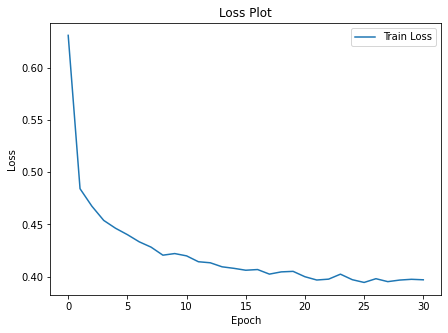

In [44]:
print(pt_model.history.history.keys())

## Plot Losses
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(pt_model.history['loss'])),
         pt_model.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Plot')
plt.show()

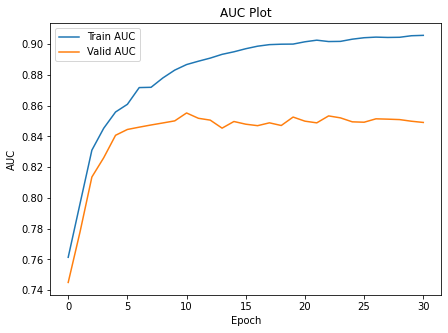

In [45]:
## Plot AUCs
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(pt_model.history['train_auc'])),
         pt_model.history['train_auc'], label='Train AUC')
plt.plot(np.arange(len(pt_model.history['valid_auc'])),
         pt_model.history['valid_auc'], label='Valid AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.title('AUC Plot')
plt.show()

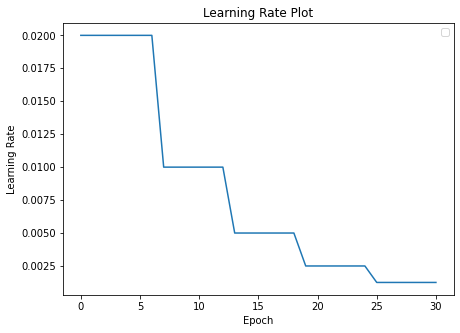

In [46]:
## Plot Learning Rates
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(pt_model.history['lr'])),
         pt_model.history['lr'])
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Learning Rate Plot')
plt.show()

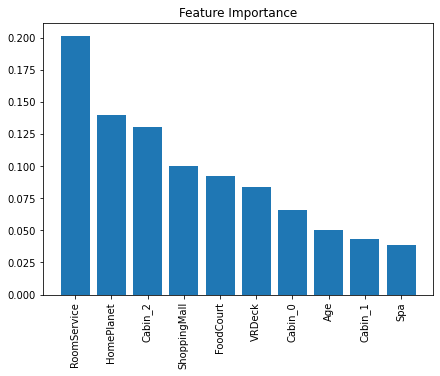

In [47]:
## Plot Feature Importance
importance = pt_model.feature_importances_
importance_df = pd.DataFrame(importance,
                             index=feature_columns,
                             columns=['importance'])
importance_df.sort_values(by='importance',
                          ascending=False,
                          inplace=True)
top10_importance = np.array(importance_df[:10].values.reshape([-1]))
top10_features = importance_df[:10].index

#importance_df[:10].plot.bar()

plt.figure(figsize=(7, 5))
plt.bar(x=np.arange(10),
        height=top10_importance)
plt.xticks(np.arange(10), top10_features, rotation='vertical')
plt.title('Feature Importance')
plt.show()

In [48]:
## Inference and Submission
probas = pt_model.predict(X_test)
probas = np.squeeze(probas)

preds = np.where(probas > 0.5, True, False)

submission_df['Transported'] = preds
submission_df.to_csv('submission_pt_pretrain.csv', index=False)
submission_df.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


---
#### Public Score: ~ 0.787

---

<a id ="5"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>5. TabNet from Scratch</center></h1>

Now let's dive into the details of TabNet's architecture. I will construct TabNet with TensorFlow step by step. First of all, I will prepare the input data for the model: Datasets, Input Layers, Preprocessing Layers, and Embedding Layers. Construction of TabNet will start at <a href="#5.2">5.2 TabNet from Scratch[TensorFlow]</a>.

<a id ="5.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>5.1 Data Preprocessing for TabNet[TensorFlow]</center></h2>

<a id ="5.1.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.1.1 Datasets</center></h2>

In [49]:
def df_to_dataset(dataframe, num_columns, target=None,
                  shuffle=False, repeat=False,
                  batch_size=5, drop_remainder=False):
    df = dataframe.copy()
    if target is not None:
        labels = df.pop(target)
        data = {key: value[:, tf.newaxis] for key, value in df.items()}
        data = dict(data)
        ds = tf.data.Dataset.from_tensor_slices((data, labels))
    else:
        data = {key: value[:, tf.newaxis] for key, value in df.items()}
        data = dict(data)
        ds = tf.data.Dataset.from_tensor_slices(data)
    
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    if repeat:
        ds = ds.repeat()
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)
    ds = ds.prefetch(batch_size)
    return ds

In [50]:
## Create datasets
num_columns = exp_config['num_columns']
batch_size = exp_config['batch_size']

train_ds = df_to_dataset(train_fold, num_columns,
                         target='Transported',
                         shuffle=True,
                         repeat=False,
                         batch_size=batch_size,
                         drop_remainder=False)

valid_ds = df_to_dataset(valid_fold, num_columns,
                         target='Transported',
                         shuffle=False,
                         repeat=False,
                         batch_size=batch_size,
                         drop_remainder=False)

## Display a batch sample
example = next(iter(train_ds))[0]
input_dtypes = {}
for key in example:
    input_dtypes[key] = example[key].dtype
    print(f'{key}, shape:{example[key].shape}, {example[key].dtype}')

PassengerId, shape:(512, 1), <dtype: 'string'>
HomePlanet, shape:(512, 1), <dtype: 'string'>
CryoSleep, shape:(512, 1), <dtype: 'string'>
Destination, shape:(512, 1), <dtype: 'string'>
Age, shape:(512, 1), <dtype: 'int64'>
VIP, shape:(512, 1), <dtype: 'string'>
RoomService, shape:(512, 1), <dtype: 'int64'>
FoodCourt, shape:(512, 1), <dtype: 'int64'>
ShoppingMall, shape:(512, 1), <dtype: 'int64'>
Spa, shape:(512, 1), <dtype: 'int64'>
VRDeck, shape:(512, 1), <dtype: 'int64'>
Cabin_0, shape:(512, 1), <dtype: 'string'>
Cabin_1, shape:(512, 1), <dtype: 'int64'>
Cabin_2, shape:(512, 1), <dtype: 'string'>
k_folds, shape:(512, 1), <dtype: 'int64'>


2022-07-23 08:16:34.121273: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


<a id ="5.1.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.1.2 Preprocessing Layers</center></h2>

In [51]:
## After binning, all features are categorical.
numerical_columns = []
categorical_columns = ['Age', 'RoomService', 'FoodCourt',
                       'ShoppingMall', 'Spa', 'VRDeck',
                       'HomePlanet', 'CryoSleep',
                       'Destination', 'VIP', 
                       'Cabin_0', 'Cabin_1', 'Cabin_2']

In [52]:
## Preprocessing model inputs
def create_preprocess_inputs(numerical, categorical, num_columns, input_dtypes):
    preprocess_inputs = {}
    numerical_inputs = {key: layers.Input(shape=(1,),
                                          dtype=input_dtypes[key]) for key in numerical}
    categorical_inputs = {key: layers.Input(shape=(1,), 
                                            dtype=input_dtypes[key]) for key in categorical}
    preprocess_inputs.update(**numerical_inputs, **categorical_inputs)
    return preprocess_inputs


preprocess_inputs = create_preprocess_inputs(numerical_columns,
                                             categorical_columns,
                                             num_columns,
                                             input_dtypes)
preprocess_inputs

{'Age': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_1')>,
 'RoomService': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_2')>,
 'FoodCourt': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_3')>,
 'ShoppingMall': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_4')>,
 'Spa': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_5')>,
 'VRDeck': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_6')>,
 'HomePlanet': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_7')>,
 'CryoSleep': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_8')>,
 'Destination': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_9')>,
 'VIP': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_10')>,
 'Cabin_0': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'input_11')>,
 'Cabin_1': <KerasTensor: shape=(None, 1) dtype=int

In [53]:
## Create Preprocessing Model
def create_preprocessing_model(numerical, categorical,
                               num_columns, input_dtypes, df):
    
    ## Create inputs
    preprocess_inputs = create_preprocess_inputs(numerical,
                                                 categorical,
                                                 num_columns,
                                                 input_dtypes)
    
    ## Preprocessing layers for numerical_features
    normalize_layers = {}
    for nc in numerical:
        normalize_layer = layers.Normalization(mean=df[nc].mean(),
                                               variance=df[nc].var())
        normalize_layers[nc] = normalize_layer
        
    ## Preprocessing layers for categorical_features
    lookup_layers = {}
    for cc in categorical:
        if input_dtypes[cc] is tf.string:
            lookup_layer = layers.StringLookup(vocabulary=df[cc].unique(),
                                               output_mode='int')
        elif input_dtypes[cc] is tf.int64:
            lookup_layer = layers.IntegerLookup(vocabulary=df[cc].unique(),
                                                output_mode='int')
        lookup_layers[cc] = lookup_layer
    
    ## Create outputs
    preprocess_outputs = {}
    for key in preprocess_inputs:
        if key in normalize_layers:
            output = normalize_layers[key](preprocess_intputs[key])
            preprocess_outputs[key] = output
        elif key in lookup_layers:
            output = lookup_layers[key](preprocess_inputs[key])
            preprocess_outputs[key] = output
            
    ## Create model
    preprocessing_model = tf.keras.Model(preprocess_inputs,
                                         preprocess_outputs)
    
    return preprocessing_model, lookup_layers


preprocessing_model, lookup_layers = create_preprocessing_model(numerical_columns,
                                                             categorical_columns,
                                                             num_columns,
                                                             input_dtypes,
                                                             train_fold)

In [54]:
## Apply the preprocessing model in tf.data.Dataset.map
train_ds = train_ds.map(lambda x, y: (preprocessing_model(x), y),
                        num_parallel_calls=tf.data.AUTOTUNE)
valid_ds = valid_ds.map(lambda x, y: (preprocessing_model(x), y),
                        num_parallel_calls=tf.data.AUTOTUNE)

## Display a preprocessed input sample
example = next(train_ds.take(1).as_numpy_iterator())[0]
for key in example:
    print(f'{key}, shape:{example[key].shape}, {example[key].dtype}')

Age, shape:(512, 1), int64
RoomService, shape:(512, 1), int64
FoodCourt, shape:(512, 1), int64
ShoppingMall, shape:(512, 1), int64
Spa, shape:(512, 1), int64
VRDeck, shape:(512, 1), int64
HomePlanet, shape:(512, 1), int64
CryoSleep, shape:(512, 1), int64
Destination, shape:(512, 1), int64
VIP, shape:(512, 1), int64
Cabin_0, shape:(512, 1), int64
Cabin_1, shape:(512, 1), int64
Cabin_2, shape:(512, 1), int64


2022-07-23 08:16:35.061266: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


<a id ="5.1.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.1.3 Embedding Layers</center></h2>

In [55]:
## Training Model Inputs
def create_model_inputs(numerical, categorical, input_dtypes):
    model_inputs = {}
    
    normalized_inputs = {key: layers.Input(shape=(1,),
                                           dtype=input_dtypes[key]) for key in numerical}
    lookup_inputs = {key: layers.Input(shape=(1,),
                                       dtype='int64') for key in categorical}
    model_inputs.update(**normalized_inputs, **lookup_inputs)
    return model_inputs

model_inputs = create_model_inputs(numerical_columns,
                                   categorical_columns,
                                   input_dtypes)
model_inputs

{'Age': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_27')>,
 'RoomService': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_28')>,
 'FoodCourt': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_29')>,
 'ShoppingMall': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_30')>,
 'Spa': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_31')>,
 'VRDeck': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_32')>,
 'HomePlanet': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_33')>,
 'CryoSleep': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_34')>,
 'Destination': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_35')>,
 'VIP': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_36')>,
 'Cabin_0': <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'input_37')>,
 'Cabin_1': <KerasTensor: shape=(None, 1) dtype

In [56]:
## Create Embedding Layers
def create_embedding_layers(model_inputs, numerical, categorical,
                            lookup_layers, emb_dim):
    numerical_feature_list = []
    encoded_categorical_feature_list = []
    
    for key in model_inputs:
        if key in numerical:
            numerical_feature_list.append(model_inputs[key])
        elif key in categorical:
            ## Create Embeddings for categorical features
            embedding = layers.Embedding(input_dim=lookup_layers[key].vocabulary_size(),
                                         output_dim=emb_dim)
            encoded_categorical_feature = embedding(model_inputs[key])
            encoded_categorical_feature_list.append(encoded_categorical_feature)
    
    if len(numerical_feature_list) != 0:
        numerical_features = tf.concat(numerical_feature_list, axis=1)
    else:
        numerical_features = tf.stack(numerical_feature_list)
    
    encoded_categorical_features = tf.concat(encoded_categorical_feature_list, axis=1)
    return numerical_features, encoded_categorical_features

emb_dim = model_config['emb_dim']
numerical_features, encoded_categorical_features = create_embedding_layers(model_inputs,
                                                                           numerical_columns,
                                                                           categorical_columns,
                                                                           lookup_layers,
                                                                           emb_dim)
numerical_features.shape, encoded_categorical_features.shape

(TensorShape([0]), TensorShape([None, 13, 1]))

<a id ="5.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>5.2 TabNet from Scratch[TensorFlow]</center></h2>

As we saw earlier, TabNet consists of encoder and decoder. However, when we don't execute pre-training, we only need the encoder structure to make predictions. So at first, I will construct TabNet Encoder at section <a href="#5.2">5.2 TabNet from Scratch[TensorFlow]</a>. Then, TabNet Decoder would be explained at section <a href="#5.3">5.3 Pre-training and Fine-tuning from Scratch</a>.

<a id ="5.2.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.2.1 TabNet Encoder from Scratch</center></h2>

The figure below shows the data-processing flows in TabNet Encoder. Each steps are called decision steps.

<img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-23.png" width="700"/>

Please remember that tree-based calculation is executed by the multiplyng masks by features. And the architecture shows that masks are made by Attentive transformer block. The inside of Attentive transformer block is as follows.

<img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-26.png" width="300"/>

In Attentive transformer block, features are transformed by Fully Connected Layer, and normalized by Batch Normalization Layer. Then, the results are clipped from zero to one by sparsemax function. Sparsemax is like sigmoid or softmax function, but a big difference is that sparsemax outputs zero, whereas sigmoid and softmax output above zero (please look at the figure below). Thus, features become sparse and are used as masks.

<img src="https://miro.medium.com/max/748/1*EK55_sEqmQDSXcIV2CGLKg.png" width="300"/>

The masks represent the importance of features at each decision steps. If a feature is considered important for the first decision step, then other features should be selected at the following decision steps. Such adjustment is executed by Prior scales. Prior scales are calculated as follows:

$$
P[i]=\prod^{i-1}_{j=1}\left(\gamma -M[j]\right).
$$

$P[i]$ is Prior scales at the $i$th decision step. $M[j]$ is mask at the $j$th decision step. $\gamma\ge 1$ is called relaxation parameter. The Prior scales at the first decision step are all ones, and are updated at each steps.

Now, we have understood the architecture of Attentive transformer block, so let's create it.

In [57]:
class AttentiveTransformer(layers.Layer):
    def __init__(self,
                 units: Optional[int]=None):
        super().__init__()
        self.units = units
        
    def build(self,
              input_shape: tf.TensorShape):
        if self.units is None:
            self.units = input_shape[-1]
            
        self.fc = layers.Dense(self.units,
                               use_bias=False)
        self.bn = layers.BatchNormalization()
        
    def call(self,
             inputs: Union[tf.Tensor, np.ndarray],
             priors: Optional[Union[tf.Tensor, np.ndarray]]=None,
             training: Optional[bool]=None) -> tf.Tensor:
        x = self.fc(inputs, training=training)
        x = self.bn(x, training=training)
        
        if priors is None:
            outputs = x
        else:
            outputs = x * priors
            
        return tfa.activations.sparsemax(outputs)

The results of multiplying the normalized inputs by the mask made with Attentive transformer block is successively going to be the input of Feature transformer block. Next, let's look at the structure of Feature transformer block.

<img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-25.png" width="700"/>

Feature transformer block consists of Fully Connected Layers, Batch Normalization Layers, and GLU Layers. GLU means "Gated Linear Unit", and calculates the following formula:

$$
(X*W+b)\otimes \sigma(X*V+c)
$$

$X$ is input, and $(X*W+b)$ is a linear transformation. Because $\sigma(\cdot)$ is sigmoid function, $\sigma(X*V+c)$ works as an information gate: The result of $(X*V+c)$ is clipped from 0 to 1, and indicates the percentage of passing the corresponding value of $(X*W+b)$. You can also find skip (residual) connections.

As the above figure shows, the parameters of first half of Feature transformer block is shared across decision steps, and the second half of it is not. Then, let's define GLU Layer and Feature transformer block.

In [58]:
class GLULayer(layers.Layer):
    def __init__(self,
                 units: Optional[int]=None):
        super().__init__()
        self.units = units
        
    def build(self,
              input_shape: tf.TensorShape):
        if self.units is None:
            self.units = input_shape[-1]
        self.fc_output = layers.Dense(self.units)
        self.fc_gate = layers.Dense(self.units)
        
    def call(self, 
             inputs: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None):
        output = self.fc_output(inputs, training=training)
        gate = self.fc_gate(inputs, training=training)
        return output * tf.keras.activations.sigmoid(gate)

    
class FCBNGLUBlock(layers.Layer):
    def __init__(self,
                 units: Optional[int]=None):
        super().__init__()
        self.units = units
        
    def build(self,
              input_shape: tf.TensorShape):
        if self.units is None:
            self.units = input_shape[-1]
        self.fc = layers.Dense(self.units)
        self.bn = layers.BatchNormalization()
        self.glu = GLULayer(self.units)
        
    def call(self,
             inputs: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None):
        x = self.fc(inputs, training=training)
        x = self.bn(x, training=training)
        outputs = self.glu(x, training=training)
        return outputs


class FeatureTransformerBlock(layers.Layer):
    def __init__(self, 
                 units: Optional[int]=None,
                 skip: bool=False):
        super().__init__()
        self.units = units
        self.skip = skip
        
    def build(self,
              input_shape: tf.TensorShape):
        if self.units is None:
            self.units = input_shape[-1]
            
        self.initial = FCBNGLUBlock(units=self.units)
        self.residual = FCBNGLUBlock(units=self.units)
        
    def call(self,
             inputs: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None):
        initial = self.initial(inputs, training=training)
        
        if self.skip == True:
            initial = (initial + inputs) * np.sqrt(0.5)
            
        residual = self.residual(initial, training=training)
        outputs = (initial + residual) * np.sqrt(0.5)
        return outputs

Finally, we have reached the stage of constructing the whole TabNet encoder. Let's see again the architecture.

<img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-23.png" width="700"/>

Split layer in $i$th decision step divides the result of Feature transformer block into $a[i]\in \mathbb{R}^{B\times N_a}$ and $d[i]\in\mathbb{R}^{B\times N_d}$. $a[i]$ is the input of Attentive transformer block in the next step. $d[i]$ is used for two purposes. One is to calculate the final output of the encoder model, called "decision embedding". Decision embedding $d_{out}$, which is used for the final prediciton of TabNet model, is calculated as follows:

$$
d_{out}=\sum^{N_{steps}}_{i=1}\text{ReLU}(d[i])
$$

Another purpose is to calculate the importance of features (Feature attributes). Mask in the $i$th step $M[i]\in \mathbb{R}^{B\times N_d}$ simply represents the feature importances in the $i$th decision step. To calculate the feature importances over the whole decision steps $M_{agg}\in \mathbb{R}^{B\times N_d}$, the importance of each decision steps itself $\eta[i]$ should be considered.  $\eta[i]$ is calculated as follows:

$$
\eta_{b}[i]=\sum_{c=1}^{N_d}\text{ReLU}(d_{b, c}[i])
$$

Then, Feature attributes $M_{agg}$, which is the weighted average of $M[i]$, is calculated as follows:

$$
M_{agg-b,j}=\frac{\sum^{N_{steps}}_{i=1}\eta_b[i]M_{b,j}[i]}{\sum^D_{j=1}\sum^{N_{steps}}_{i=1}\eta_b[i]M_{b,j}[i]}
$$

---
In addition, there are some points that you can't see in the architecture figure.

- **The sparsity loss:** For the loss calculation, the sparsity of the mask is considered like this.

 $$
 Loss + \lambda_{sparse} L_{sparse}
 $$

 $\lambda_{sparse}$ is a hyperparameter that controls the impact of sparsity loss, $L_{sparse}$, which is calculated as follows:

 $$
 L_{sparse}=\sum^{N_{step}}_{i=1}\sum^{B}_{b=1}\sum^{D}_{j=1}\frac{-{\bf{M}}_{b, j}[i]\log\left({\bf{M}}_{b, j}[i]+\epsilon\right)}{N_{steps}\cdot B}
 $$

 The graph of $-x\log x$ looks like the figure below. It means that when the mask values greatly differ from 0 or 1, the sparsity loss increases. Intermediate values would be the penalty.

 <img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-50.png" width="500"/>

 
- **Ghost Batch Normalization:** In the original implementation, batch normalization in Feature transformer block is executed on the ghost batch units, which size is smaller than mini batch. However, in this TabNet model from scratch, I used normal Batch Normalization Layer.

Now, let's complete building TabNet encoder model!

In [59]:
class TabNetEncoder(layers.Layer):
    def __init__(self,
                 output_dims: int=1,
                 n_steps: int=3,
                 feature_dims: int=16,
                 gamma: float=1.3,
                 epsilon: float=1e-8,
                 lambda_sparsity: float=1e-4):
        super().__init__()
        self.output_dims = output_dims
        self.n_steps = n_steps
        self.feature_dims = feature_dims
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_sparsity = lambda_sparsity
        
    def build(self,
              input_shape: tf.TensorShape):
        self.bn_initial = layers.BatchNormalization()
        self.shared_ft = FeatureTransformerBlock(units=self.feature_dims*2)
        self.final_decision = layers.Dense(self.output_dims)
        
        self.ft_initial = FeatureTransformerBlock(units=self.feature_dims*2, skip=True)
        self.attentives = [AttentiveTransformer(units=input_shape[-1]) for _ in range(self.n_steps)]
        self.unique_fts = [FeatureTransformerBlock(units=self.feature_dims*2,
                                                   skip=True) for _ in range(self.n_steps)]
        
    def call(self, 
             X: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None) -> Tuple[tf.Tensor]:
        sparse_loss = 0.
        encoded = []
        final_decision_inputs = 0.
        attributes = tf.zeros_like(X)
        priors = tf.ones_like(X)
        
        B = self.bn_initial(X, training=training)
        shared = self.shared_ft(B, training=training)
        initial_split = self.ft_initial(shared, training=training)
        attn_inputs = initial_split[:, :self.feature_dims]
        
        for i in range(self.n_steps):
            mask = self.attentives[i](attn_inputs, priors, training=training)
            shared = self.shared_ft(mask * B, training=training)
            split = self.unique_fts[i](shared, training=training)
            attn_inputs = split[:, :self.feature_dims]
            encoded_repr = split[:, self.feature_dims:]
            encoded.append(encoded_repr)
            
            step_outputs = tf.keras.activations.relu(encoded_repr)
            final_decision_inputs += step_outputs
            
            step_importance = tf.reduce_sum(step_outputs, axis=1, keepdims=True)
            attributes += step_importance * mask
            
            sparse_loss += tf.reduce_mean(tf.reduce_sum(-mask * tf.math.log(mask + self.epsilon), axis=-1)) / tf.cast(self.n_steps, tf.float32)
            priors *= tf.cast(self.gamma, tf.float32) - mask
            
        self.add_loss(self.lambda_sparsity * sparse_loss)
        outputs = self.final_decision(final_decision_inputs, training=training)
        attr_sum = tf.reduce_sum(attributes, axis=-1, keepdims=True)
        importance = attributes / attr_sum
        encoded = tf.stack(encoded)
        
        return outputs, importance, encoded

In [60]:
class TabNet(tf.keras.Model):
    def __init__(self,
                 output_dims: int=1,
                 n_steps: int=3,
                 feature_dims: int=16,
                 gamma: float=1.3,
                 epsilon: float=1e-8,
                 lambda_sparsity: float=1e-4,
                 pretrained_encoder: Optional[layers.Layer]=None):
        
        super().__init__()
        self.output_dims = output_dims
        self.n_steps = n_steps
        self.feature_dims = feature_dims
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_sparsity = lambda_sparsity
        self.pretrained_encoder = pretrained_encoder
        
        if self.pretrained_encoder is None:
            self.encoder = TabNetEncoder(output_dims=output_dims,
                                         n_steps=n_steps,
                                         feature_dims=feature_dims,
                                         gamma=gamma,
                                         epsilon=epsilon,
                                         lambda_sparsity=lambda_sparsity)
        else:
            self.encoder = pretrained_encoder
            
    def forward(self,
                X: Union[tf.Tensor, np.ndarray],
                training: Optional[bool]=None) -> Tuple[tf.Tensor]:
        outputs, importance, encoded = self.encoder(X, training=training)
        return outputs, importance, encoded
    
    def call(self,
             X: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None) -> tf.Tensor:
        outputs, importance, _ = self.forward(X, training=training)
        return outputs, importance
    
    def explain(self,
                X: Union[tf.Tensor, np.ndarray],
                training: Optional[bool]=None) -> tf.Tensor:
        _, importance, _ = self.forward(X, training=training)
        return importance
    
    def transform(self,
                  X: Union[tf.Tensor, np.ndarray],
                  training: Optional[bool]=None) -> tf.Tensor:
        _, _, encoded = self.forward(X, training=training)
        return encoded

In [61]:
## Create TabNet model
def create_tabnet(emb_dim,
                  numerical_columns,
                  categorical_columns,
                  num_columns,
                  input_dtypes,
                  lookup_layers,
                  output_dims,
                  n_steps,
                  feature_dims,
                  gamma,
                  epsilon,
                  lambda_sparsity,
                  pretrained_encoder=None):
    
    model_inputs = create_model_inputs(numerical_columns,
                                       categorical_columns,
                                       input_dtypes)
    
    numerical_features, encoded_categorical_features = create_embedding_layers(model_inputs,
                                                                           numerical_columns,
                                                                           categorical_columns,
                                                                           lookup_layers,
                                                                           emb_dim)
    
    encoded_categorical_features = layers.Flatten(
    )(encoded_categorical_features)
    
    
    ## Numerical features
    if len(numerical_columns) > 0:
        numerical_features = layers.LayerNormalization(
            name=f'numerical_norm', 
            epsilon=1e-6
        )(numerical_features)
        
        ## Concatenate categorical features with numerical features
        features = layers.Concatenate()([
            encoded_categorical_features,
            numerical_features
        ])
    else:
        features = encoded_categorical_features
        
    tabnet = TabNet(output_dims=output_dims,
                    n_steps=n_steps,
                    feature_dims=feature_dims,
                    gamma=gamma,
                    epsilon=epsilon,
                    lambda_sparsity=lambda_sparsity,
                    pretrained_encoder=pretrained_encoder)
    
    tab_outputs, tab_importance = tabnet(features)
    model_outputs = tf.keras.activations.sigmoid(tab_outputs)
    
    ## Create model
    training_model = keras.Model(inputs=model_inputs,
                                 outputs=model_outputs)
    
    return training_model
    
## Settings for TabNet
emb_dim = model_config['emb_dim']
input_dims = model_config['input_dims']
output_dims = model_config['output_dims']
n_steps = model_config['n_steps']
feature_dims = model_config['feature_dims']
gamma = model_config['gamma']
epsilon = model_config['epsilon']
lambda_sparsity = model_config['lambda_sparsity']

## Create TabNet
training_model = create_tabnet(emb_dim,
                               numerical_columns,
                               categorical_columns,
                               num_columns,
                               input_dtypes,
                               lookup_layers,
                               output_dims=output_dims,
                               n_steps=n_steps,
                               feature_dims=feature_dims,
                               gamma=gamma,
                               epsilon=epsilon,
                               lambda_sparsity=lambda_sparsity)

In [62]:
## Model Compile and Build
batch_size = exp_config['batch_size']
learning_rate = exp_config['learning_rate']
train_epochs = exp_config['train_epochs']
steps_per_epoch = len(train_fold) // batch_size

learning_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=learning_rate,
    decay_steps=train_epochs * steps_per_epoch, 
    alpha=0.0)

optimizer = keras.optimizers.Adam(learning_rate=learning_schedule)

loss_fn = keras.losses.BinaryCrossentropy(
    from_logits=False, 
    label_smoothing=model_config['label_smoothing'])

training_model.compile(optimizer=optimizer,
                       loss=loss_fn,
                       metrics=['accuracy', keras.metrics.AUC()])

#training_model.build(input_shape=(None, input_dims))
training_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_41 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_42 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_43 (InputLayer)           [(None, 1)]          0                                            
____________________________________________________________________________________________

<a id ="5.2.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.2.2 Training</center></h2>

In [63]:
## Learning Rate Finder
class LRFind(tf.keras.callbacks.Callback):
    def __init__(self, min_lr, max_lr, n_rounds):
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.step_up = tf.constant((max_lr / min_lr) ** (1 / n_rounds))
        self.lrs = []
        self.losses = []
        
    def on_train_begin(self, logs=None):
        self.weights = self.model.get_weights()
        self.model.optimizer.lr = self.min_lr
        
    def on_train_batch_end(self, batch, logs=None):
        self.lrs.append(self.model.optimizer.lr.numpy())
        self.losses.append(logs['loss'])
        self.model.optimizer.lr = self.model.optimizer.lr * self.step_up
        if self.model.optimizer.lr > self.max_lr:
            self.model.stop_training = True 
    
    def on_train_end(self, logs=None):
        self.model.set_weights(self.weights)

100/100 [==============================] - 15s 37ms/step - loss: 0.8231 - accuracy: 0.5714 - auc: 0.5878


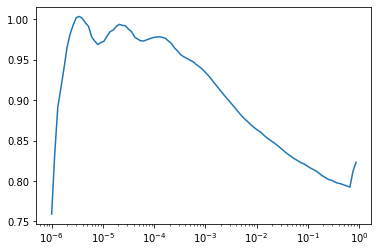

In [64]:
## Execute LR Finding
min_lr = 1e-6
max_lr = 1e-0
lr_find_epochs = 1
lr_find_steps = 100
lr_find_batch_size = 512

lr_find = LRFind(min_lr, max_lr, lr_find_steps)
lr_find_ds = df_to_dataset(train_fold, num_columns,
                           target='Transported',
                           repeat=True,
                           batch_size=lr_find_batch_size)
lr_find_ds = lr_find_ds.map(lambda x, y: (preprocessing_model(x), y),
                            num_parallel_calls=tf.data.AUTOTUNE)

training_model.fit(lr_find_ds,
                   steps_per_epoch=lr_find_steps,
                   epochs=lr_find_epochs,
                   callbacks=[lr_find])

plt.plot(lr_find.lrs, lr_find.losses)
plt.xscale('log')
plt.show()

In [65]:
## Re-construct the model
training_model = create_tabnet(emb_dim,
                               numerical_columns,
                               categorical_columns,
                               num_columns,
                               input_dtypes,
                               lookup_layers,
                               output_dims=output_dims,
                               n_steps=n_steps,
                               feature_dims=feature_dims,
                               gamma=gamma,
                               epsilon=epsilon,
                               lambda_sparsity=lambda_sparsity)

## Model Compile and Build
emb_learning_rate = exp_config['emb_learning_rate']
learning_rate = exp_config['learning_rate']
batch_size = exp_config['batch_size']
train_epochs = exp_config['train_epochs']
steps_per_epoch = len(train_fold) // batch_size

learning_schedule_1 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=emb_learning_rate,
    decay_steps=train_epochs * steps_per_epoch, 
    alpha=0.0)

learning_schedule_2 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=learning_rate,
    decay_steps=train_epochs * steps_per_epoch, 
    alpha=0.0)

optimizers = [
    tf.keras.optimizers.Adam(learning_rate=learning_schedule_1),
    tf.keras.optimizers.Adam(learning_rate=learning_schedule_2)
]
optimizers_and_layers = [(optimizers[0], training_model.layers[:26]),
                         (optimizers[1], training_model.layers[26:])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

loss_fn = keras.losses.BinaryCrossentropy(
    from_logits=False, 
    label_smoothing=model_config['label_smoothing'])

training_model.compile(optimizer=optimizer,
                       loss=loss_fn,
                       metrics=['accuracy', keras.metrics.AUC()])

In [66]:
## Checkpoint Callback
checkpoint_filepath = exp_config['checkpoint_filepath']
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    save_weights_only=True, 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True)

## Model Training
history = training_model.fit(train_ds,
                  epochs=train_epochs,
                  shuffle=True,
                  validation_data=valid_ds,
                  callbacks=[model_checkpoint_callback])

## Load the Best Parameters
training_model.load_weights(checkpoint_filepath)

Epoch 1/50
14/14 [==============================] - 14s 187ms/step - loss: 0.6307 - accuracy: 0.6884 - auc_1: 0.7426 - val_loss: 0.7033 - val_accuracy: 0.5037 - val_auc_1: 0.7304
Epoch 2/50
14/14 [==============================] - 1s 57ms/step - loss: 0.5463 - accuracy: 0.7410 - auc_1: 0.8070 - val_loss: 0.6993 - val_accuracy: 0.5037 - val_auc_1: 0.5340
Epoch 3/50
14/14 [==============================] - 1s 56ms/step - loss: 0.4990 - accuracy: 0.7591 - auc_1: 0.8384 - val_loss: 0.7450 - val_accuracy: 0.5037 - val_auc_1: 0.5963
Epoch 4/50
14/14 [==============================] - 1s 56ms/step - loss: 0.4808 - accuracy: 0.7623 - auc_1: 0.8490 - val_loss: 0.7353 - val_accuracy: 0.5043 - val_auc_1: 0.4746
Epoch 5/50
14/14 [==============================] - 1s 56ms/step - loss: 0.4645 - accuracy: 0.7689 - auc_1: 0.8598 - val_loss: 0.6864 - val_accuracy: 0.5382 - val_auc_1: 0.6326
Epoch 6/50
14/14 [==============================] - 1s 55ms/step - loss: 0.4580 - accuracy: 0.7737 - auc_1: 0.864

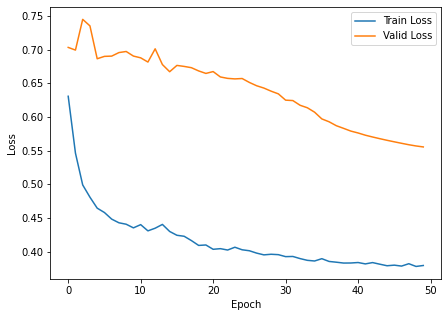

In [67]:
## Plot Losses
def plot_history(hist, title=None, valid=True):
    plt.figure(figsize=(7, 5))
    plt.plot(np.array(hist.index), hist['loss'], label='Train Loss')
    if valid:
        plt.plot(np.array(hist.index), hist['val_loss'], label='Valid Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.show()
    
hist = pd.DataFrame(history.history)
plot_history(hist)

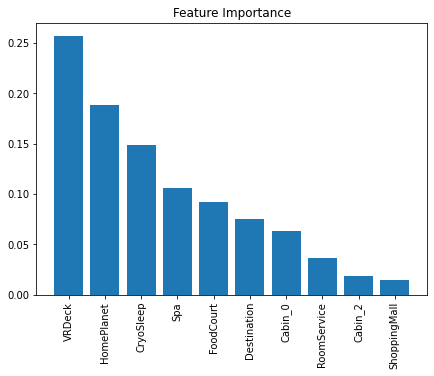

In [68]:
## Plot Feature Importance
layer_names = [l.name for l in training_model.layers]
name = layer_names[-2]

importance_model = tf.keras.Model(inputs=training_model.input,
                                  outputs=training_model.get_layer(name).output[1])

importance_list = []
for data, label in iter(train_ds):
    importance = importance_model(data)
    importance = importance.numpy()
    importance_list.append(importance)
    
importance = np.concatenate(importance_list, axis=0)
importance = np.mean(importance, axis=0)
importance_df = pd.DataFrame(importance,
                             index=list(training_model.input.keys()),
                             columns=['importance'])
importance_df.sort_values(by='importance',
                          ascending=False,
                          inplace=True)
top10_importance = np.array(importance_df[:10].values.reshape([-1]))
top10_features = importance_df[:10].index

#importance_df[:10].plot.bar()

plt.figure(figsize=(7, 5))
plt.bar(x=np.arange(10),
        height=top10_importance)
plt.xticks(np.arange(10), top10_features, rotation='vertical')
plt.title('Feature Importance')
plt.show()

<a id ="5.2.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.2.3 Inference</center></h2>

In [69]:
## Inference_model = preprocessing_model + training_model
inference_inputs = preprocessing_model.input
inference_outputs = training_model(preprocessing_model(inference_inputs))
inference_model = tf.keras.Model(inputs=inference_inputs,
                                 outputs=inference_outputs)

In [70]:
## Test Dataset
test_ds = df_to_dataset(test, num_columns,
                        target=None,
                        shuffle=False,
                        repeat=False,
                        batch_size=batch_size,
                        drop_remainder=False)

In [71]:
## Inference and Submission
probas = inference_model.predict(test_ds)
probas = np.squeeze(probas)

preds = np.where(probas > 0.5, True, False)

submission_df['Transported'] = preds
submission_df.to_csv('submission_tf.csv', index=False)
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


---
#### Public Score: ~ 0.743

---

<a id ="5.3"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>5.3 Pre-training and Fine-tuning from Scratch</center></h2>

In this section, I'm going to build TabNet encoder-decoder (autoencoder) model for the pre-training and fine-tuning as we saw in <a href="#4.2">chapter 4.2</a>.

<a id ="5.3.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.3.1 TabNet Encoder-Decoder from Scratch</center></h2>

The figure below shows the architecture of TabNet decoder.

<img src="https://data-analytics.fun/wp-content/uploads/2021/08/image-24.png" width="600"/>

TabNet decoder receives the output of the encoder, which is dimensionally reduced, and reconstructs the input features of the encoder. TabNet decoder consists of Feature transformer blocks and Fully Connected Layers. They have same structures as we saw earlier. So, let's create the decoder.

In [72]:
class TabNetDecoder(layers.Layer):
    def __init__(self,
                 output_dims: int=1,
                 n_steps: int=3,
                 feature_dims: int=16):
        super().__init__()
        self.output_dims = output_dims
        self.n_steps = n_steps
        self.feature_dims = feature_dims
        
    def build(self,
              input_shape: tf.TensorShape):
        self.shared_block = FeatureTransformerBlock(units=self.feature_dims)
        self.unique_fts = [FeatureTransformerBlock(units=self.feature_dims,
                                                   skip=True) for _ in range(self.n_steps)]
        self.fcs = [layers.Dense(self.output_dims) for _ in range(self.n_steps)]
        
    def call(self,
             encoded: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None) -> tf.Tensor:
        decoded = 0.
        
        for i in range(self.n_steps):
            shared = self.shared_block(encoded[i], training=training)
            feature = self.unique_fts[i](shared, training=training)
            outputs = self.fcs[i](feature, training=training)
            decoded += outputs
            
        return decoded

Reconstruction error for the pre-training of TabNet autoencoder is defined by the following formula:

$$
L_{reconstruct}=\sum^B_{b=1}\sum^D_{d=1}\left|\frac{\left(\hat{f}_{b,j}-f_{b,j}\right)\cdot S_{b,j}}{\sqrt{\sum^B_{b=1}\left(f_{b,j}-1/B\sum^{B}_{b=1}f_{b,j}\right)^2}}\right|
$$

$𝑓\in\mathbb{R}^{B\times D}$ is input feature, and $\hat{f}\in\mathbb{R}^{B\times D}$ is decoder's prediction. $S\in \{0, 1\}^{B\times D}$ is input-mask. When $S_{b, j}=1$, corresponding input feature is masked ($f_{b, j}$ becomes 0). Conversely, the prediction error $|\hat{f}_{b,j}-f_{b,j}|$ is added to the reconstruction loss only when $S_{b, j}=1$. Please note that input-mask $S$ is different from the mask inside the TabNet encoder $M$. The denominator of the loss is a kind of normalization term. That's the original reconstruction error, but in this TabNet model from scratch, I will use mean squared error as the reconstruction loss.

Finally, we will build the autoencoder model structure with connecting our TabNet encoder and TabNet decoder. 

In [73]:
class TabNetEncoderDecoder(layers.Layer):
    def __init__(self,
                 output_dims: int=1,
                 input_dims: int=12,
                 n_steps: int=3,
                 feature_dims: int=16,
                 gamma: float=1.3,
                 epsilon: float=1e-8,
                 lambda_sparsity: float=1e-4,
                 mask_ratio: float=0.25):
        super().__init__()
        self.output_dims = output_dims
        self.input_dims = input_dims
        self.n_steps = n_steps
        self.feature_dims = feature_dims
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_sparsity = lambda_sparsity
        self.mask_ratio = mask_ratio
        
    def build(self,
              input_shape: tf.TensorShape):
        self.encoder = TabNetEncoder(
            output_dims=self.output_dims,
            n_steps=self.n_steps,
            feature_dims=self.feature_dims,
            gamma=self.gamma,
            epsilon=self.epsilon,
            lambda_sparsity=self.lambda_sparsity)
        self.decoder = TabNetDecoder(
            output_dims=self.input_dims,
            n_steps=self.n_steps,
            feature_dims=self.feature_dims)
        self.mask_creator = layers.Dropout(self.mask_ratio)
        
    def call(self,
             X: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None) -> tf.Tensor:
        ## training mask
        input_mask = self.mask_creator(tf.ones_like(X), training=training)
        M = tf.where(input_mask != 0., tf.ones_like(X), tf.zeros_like(X))
        S = tf.where(input_mask ==0., tf.ones_like(X), tf.zeros_like(X))
        
        ## encoding
        X_M = X * M
        encoder_outputs, importance, encoded = self.encoder(X_M, training=training)
        #labels = tf.where(mask == 0., X, tf.zeros_like(X))
        
        ## decoding
        decoder_outputs = self.decoder(encoded, training=training)
        
        ## reconstruction-loss
        yt = X * S
        preds = decoder_outputs * S
        mse = tf.keras.losses.MeanSquaredError()
        self.add_loss(mse(yt, preds))
        
        return encoder_outputs, importance, encoded

In [74]:
class TabNetAutoencoder(tf.keras.Model):
    def __init__(self,
                 output_dims: int=1,
                 input_dims: int=12,
                 n_steps: int=3,
                 feature_dims: int=16,
                 gamma: float=1.3,
                 epsilon: float=1e-8,
                 lambda_sparsity: float=1e-4,
                 mask_ratio: float=0.25):
        super().__init__()
        self.output_dims = output_dims
        self.input_dims = input_dims
        self.n_steps = n_steps
        self.feature_dims = feature_dims
        self.gamma = gamma
        self.epsilon = epsilon
        self.lambda_sparsity = lambda_sparsity
        self.mask_ratio = mask_ratio
        
        self.ae = TabNetEncoderDecoder(output_dims=output_dims,
                                       input_dims=input_dims,
                                       n_steps=n_steps,
                                       feature_dims=feature_dims,
                                       gamma=gamma,
                                       epsilon=epsilon,
                                       lambda_sparsity=lambda_sparsity,
                                       mask_ratio=mask_ratio)
        
    def forward(self,
                X: Union[tf.Tensor, np.ndarray],
                training: Optional[bool]=None) -> Tuple[tf.Tensor]:
        encoder_outputs, importance, encoded = self.ae(X, training=training)
        
        return encoder_outputs, importance, encoded
        
    def call(self,
             X: Union[tf.Tensor, np.ndarray],
             training: Optional[bool]=None) -> tf.Tensor:
        encoder_outputs, importance, encoded = self.forward(X)
        
        return encoder_outputs
    
    def explain(self,
                X: Union[tf.Tensor, np.ndarray],
                training: Optional[bool]=None) -> tf.Tensor:
        _, importance, _ = self.forward(X)
        return importance
    
    def transform(self,
                  X: Union[tf.Tensor, np.ndarray],
                  training: Optional[bool]=None) -> tf.Tensor:
        _, _, encoded = self.forward(X)
        return encoded

In [75]:
def create_tabnet_ae(emb_dim,
                     numerical_columns,
                     categorical_columns,
                     num_columns,
                     input_dtypes,
                     lookup_layers,
                     output_dims,
                     n_steps,
                     feature_dims,
                     gamma,
                     epsilon,
                     lambda_sparsity,
                     mask_ratio):
    
    model_inputs = create_model_inputs(numerical_columns,
                                       categorical_columns,
                                       input_dtypes)
    
    numerical_features, encoded_categorical_features = create_embedding_layers(model_inputs,
                                                                           numerical_columns,
                                                                           categorical_columns,
                                                                           lookup_layers,
                                                                           emb_dim)
    
    encoded_categorical_features = layers.Flatten(
    )(encoded_categorical_features)
    
    
    ## Numerical features
    if len(numerical_columns) > 0:
        numerical_features = layers.LayerNormalization(
            name=f'numerical_norm', 
            epsilon=1e-6
        )(numerical_features)
        
        ## Concatenate categorical features with numerical features
        features = layers.Concatenate()([
            encoded_categorical_features,
            numerical_features
        ])
    else:
        features = encoded_categorical_features
        
    tabnet_ae = TabNetAutoencoder(
        output_dims=output_dims,
        input_dims=input_dims,
        n_steps=n_steps,
        feature_dims=feature_dims,
        gamma=gamma,
        epsilon=epsilon,
        lambda_sparsity=lambda_sparsity,
        mask_ratio=mask_ratio)
    
    model_outputs = tabnet_ae(features)
    
    ## Create model
    training_model = keras.Model(inputs=model_inputs,
                                 outputs=model_outputs)
    
    return training_model

In [76]:
## Settings for TabNet Encoder-Decoder
input_dims = model_config['input_dims']
output_dims = model_config['output_dims']
n_steps = model_config['n_steps']
feature_dims = model_config['feature_dims']
lambda_sparsity = model_config['lambda_sparsity']
gamma = model_config['gamma']
epsilon = model_config['epsilon']
lambda_sparsity = model_config['lambda_sparsity']
mask_ratio = model_config['mask_ratio']

## Create TabNet Encoder-Decoder
tabnet_ae = create_tabnet_ae(
    emb_dim,
    numerical_columns,
    categorical_columns,
    num_columns,
    input_dtypes,
    lookup_layers,
    output_dims=output_dims,
    n_steps=n_steps,
    feature_dims=feature_dims,
    gamma=gamma,
    epsilon=epsilon,
    lambda_sparsity=lambda_sparsity,
    mask_ratio=mask_ratio)

## Model Compile and Build
lr = exp_config['pretrain_lr']
optimizer = keras.optimizers.Adam(learning_rate=lr)

@tf.function
def dummy_loss(y, t):
    return 0.

tabnet_ae.compile(optimizer=optimizer,
                  loss=dummy_loss)

#tabnet_ae.build(input_shape=(None, input_dims))
tabnet_ae.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_66 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_67 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_68 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           [(None, 1)]          0                                            
____________________________________________________________________________________________

<a id ="5.3.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.3.2 Pre-Training and Fine-Tuning</center></h2>

In [77]:
## Model Pre-training
epochs = exp_config['pretrain_epochs']

tabnet_ae.fit(train_ds,
              epochs=epochs)

Epoch 1/10
14/14 [==============================] - 17s 45ms/step - loss: 0.0933
Epoch 2/10
14/14 [==============================] - 1s 50ms/step - loss: 0.0102
Epoch 3/10
14/14 [==============================] - 1s 46ms/step - loss: 0.0040
Epoch 4/10
14/14 [==============================] - 1s 46ms/step - loss: 0.0026
Epoch 5/10
14/14 [==============================] - 1s 47ms/step - loss: 0.0021
Epoch 6/10
14/14 [==============================] - 1s 46ms/step - loss: 0.0019
Epoch 7/10
14/14 [==============================] - 1s 46ms/step - loss: 0.0017
Epoch 8/10
14/14 [==============================] - 1s 46ms/step - loss: 0.0017
Epoch 9/10
14/14 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 10/10
14/14 [==============================] - 1s 46ms/step - loss: 0.0015


In [78]:
## Creating Pre-trained Model
pretrained_model = create_tabnet(
    emb_dim,
    numerical_columns,
    categorical_columns,
    num_columns,
    input_dtypes,
    lookup_layers,
    output_dims=output_dims,
    n_steps=n_steps,
    feature_dims=feature_dims,
    gamma=gamma,
    epsilon=epsilon,
    lambda_sparsity=lambda_sparsity,
    pretrained_encoder=tabnet_ae.layers[-1].ae.encoder)


## Pre-trained Model Compile and Build
emb_learning_rate = exp_config['emb_finetune_lr']
learning_rate = exp_config['finetune_lr']
batch_size = exp_config['batch_size']
train_epochs = exp_config['train_epochs']
steps_per_epoch = len(train_fold) // batch_size

learning_schedule_1 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=emb_learning_rate,
    decay_steps=train_epochs * steps_per_epoch, 
    alpha=0.0)

learning_schedule_2 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=learning_rate,
    decay_steps=train_epochs * steps_per_epoch, 
    alpha=0.0)

optimizers = [
    tf.keras.optimizers.Adam(learning_rate=learning_schedule_1),
    tf.keras.optimizers.Adam(learning_rate=learning_schedule_2)
]
optimizers_and_layers = [(optimizers[0], pretrained_model.layers[:26]),
                         (optimizers[1], pretrained_model.layers[26:])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

loss_fn = keras.losses.BinaryCrossentropy(
    from_logits=False, 
    label_smoothing=model_config['label_smoothing'])

pretrained_model.compile(optimizer=optimizer,
                         loss=loss_fn,
                         metrics=['accuracy', keras.metrics.AUC()])

#pretrained_model.build(input_shape=(None, input_dims))
pretrained_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_79 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_80 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_81 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_82 (InputLayer)           [(None, 1)]          0                                            
____________________________________________________________________________________________

In [79]:
## Checkpoint Callback
checkpoint_filepath = exp_config['checkpoint_filepath']
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    save_weights_only=True, 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True)

## Model Fine-tuning
history = pretrained_model.fit(
    train_ds,
    epochs=train_epochs,
    shuffle=True,
    validation_data=valid_ds,
    callbacks=[model_checkpoint_callback])

## Load the Best Parameters
pretrained_model.load_weights(checkpoint_filepath)

Epoch 1/50
14/14 [==============================] - 15s 202ms/step - loss: 0.6708 - accuracy: 0.6435 - auc_2: 0.6975 - val_loss: 0.6729 - val_accuracy: 0.6423 - val_auc_2: 0.7187
Epoch 2/50
14/14 [==============================] - 1s 57ms/step - loss: 0.5635 - accuracy: 0.7097 - auc_2: 0.7808 - val_loss: 0.6707 - val_accuracy: 0.6124 - val_auc_2: 0.6735
Epoch 3/50
14/14 [==============================] - 1s 58ms/step - loss: 0.5283 - accuracy: 0.7404 - auc_2: 0.8105 - val_loss: 0.6670 - val_accuracy: 0.6412 - val_auc_2: 0.7209
Epoch 4/50
14/14 [==============================] - 1s 58ms/step - loss: 0.5207 - accuracy: 0.7358 - auc_2: 0.8158 - val_loss: 0.6680 - val_accuracy: 0.7056 - val_auc_2: 0.7714
Epoch 5/50
14/14 [==============================] - 1s 59ms/step - loss: 0.5146 - accuracy: 0.7436 - auc_2: 0.8192 - val_loss: 0.6565 - val_accuracy: 0.5733 - val_auc_2: 0.7810
Epoch 6/50
14/14 [==============================] - 1s 58ms/step - loss: 0.5033 - accuracy: 0.7555 - auc_2: 0.827

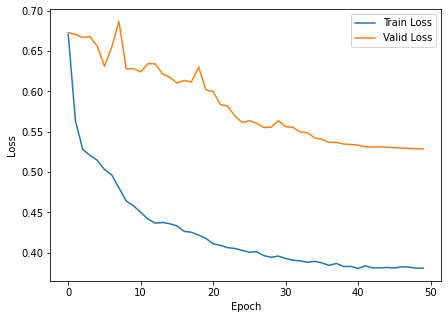

In [80]:
## Plot Losses   
hist = pd.DataFrame(history.history)
plot_history(hist)

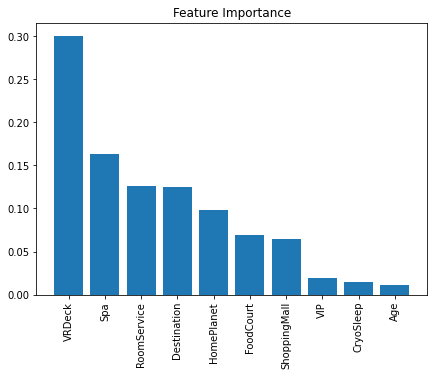

In [81]:
## Plot Feature Importance
layer_names = [l.name for l in pretrained_model.layers]
name = layer_names[-2]

importance_model = tf.keras.Model(inputs=pretrained_model.input,
                                  outputs=pretrained_model.get_layer(name).output[1])

importance_list = []
for data, label in iter(train_ds):
    importance = importance_model(data)
    importance = importance.numpy()
    importance_list.append(importance)
    
importance = np.concatenate(importance_list, axis=0)
importance = np.mean(importance, axis=0)
importance_df = pd.DataFrame(importance,
                             index=list(pretrained_model.input.keys()),
                             columns=['importance'])
importance_df.sort_values(by='importance',
                          ascending=False,
                          inplace=True)
top10_importance = np.array(importance_df[:10].values.reshape([-1]))
top10_features = importance_df[:10].index

#importance_df[:10].plot.bar()

plt.figure(figsize=(7, 5))
plt.bar(x=np.arange(10),
        height=top10_importance)
plt.xticks(np.arange(10), top10_features, rotation='vertical')
plt.title('Feature Importance')
plt.show()

<a id ="5.3.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>5.3.3 Inference</center></h2>

In [82]:
## Inference_model = preprocessing_model + training_model
inference_inputs = preprocessing_model.input
inference_outputs = pretrained_model(preprocessing_model(inference_inputs))
inference_model = tf.keras.Model(inputs=inference_inputs,
                                 outputs=inference_outputs)

In [83]:
## Inference and Submission
probas = inference_model.predict(test_ds)
probas = np.squeeze(probas)

preds = np.where(probas > 0.5, True, False)

submission_df['Transported'] = preds
submission_df.to_csv('submission_tf_pretrain.csv', index=False)
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


---
#### Public Score: ~ 0.786

---